In [41]:
import subprocess
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import OneHotEncoder

### kaggle.json

/home/jrabal/.config/kaggle/kaggle.json.

## LEER DATASET DE KAGGLE

In [42]:
# Listar competiciones (equivalente a !kaggle competitions list)
print("\n--- Listado de Competiciones ---")
!kaggle competitions list | head -n 10  # Limitamos la salida a las 10 primeras líneas

# Descargar datos de la competición
print("\n--- Descargando Datos ---")
!kaggle competitions download -c house-prices-advanced-regression-techniques

# Descomprimir el archivo zip
print("\n--- Descomprimiendo Archivos ---")
# El comando 'unzip' solo funciona en sistemas Unix/Linux. Si usas Windows, prueba 'tar -xf'.
!unzip -o house-prices-advanced-regression-techniques.zip

print("\nProceso completado. Los archivos ya deberían estar en tu directorio actual.")


--- Listado de Competiciones ---
ref                                                                                 deadline             category                reward  teamCount  userHasEntered  
----------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/arc-prize-2025                                  2025-11-03 23:59:00  Featured         1,000,000 Usd       1304           False  
https://www.kaggle.com/competitions/hull-tactical-market-prediction                 2025-12-15 23:59:00  Featured           100,000 Usd       1472           False  
https://www.kaggle.com/competitions/google-code-golf-2025                           2025-10-30 23:59:00  Research           100,000 Usd       1113           False  
https://www.kaggle.com/competitions/recodai-luc-scientific-image-forgery-detection  2026-01-15 23:59:00  Research            55,000 Usd      

## LEER TRAIN y TEST DATA

In [43]:
# Read the train data
# Utilizamos el delimitador por defecto (coma)
train = pd.read_csv('train.csv')

# Read the test data
test = pd.read_csv('test.csv')

# Print train and test columns
# Utilizamos la propiedad .columns.tolist() para obtener una lista de nombres
print('Train columns:', train.columns.tolist())
print('\n Test columns:', test.columns.tolist())

# Show the number of data samples or rows and features in each data sample
# Utilizamos el atributo .shape del DataFrame de entrenamiento
num_registros, num_vars = train.shape

print(f"\n Count of data samples: {num_registros}")
print(f"\n Count of features: {num_vars}")

Train columns: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Pool

In [44]:
train.shape

(1460, 81)

## LEER SUBMISION_FILE

In [45]:
# Read the sample submission file
sample_submission = pd.read_csv('sample_submission.csv')

# Look at the head() of the sample submission
print("\nSample Submission Head:")
sample_submission.head()


Sample Submission Head:


Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

## Entender los datos

Se requiere un análisis exploratorio de datos (EDA) para comprender los datos y prepararse para la ingeniería de características.

Primero identificamos los diferentes tipos de datos.

Después de eso, los exploramos aplicando diferentes estrategias:

- Para las características numéricas, exploramos su distribución estadística y su relación con la variable objetivo.

- Para las características categóricas, exploramos sus recuentos de muestras y la relación con los valores objetivo para cada categoría.

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## ydata_profiling

In [ ]:
# !pip install ydata_profiling
profile = ProfileReport(train, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 81/81 [00:00<00:00, 97.52it/s]


## Exploración de características numéricas

Normalmente exploramos las características numéricas que mostramos:

El histograma (normal o acumulativo) para comprender la distribución de valores en el conjunto de datos.
El diagrama de dispersión de la característica y la variable objetivo, para comparar la relación entre ellas.


Text(0.5, 0, 'GrLivArea')

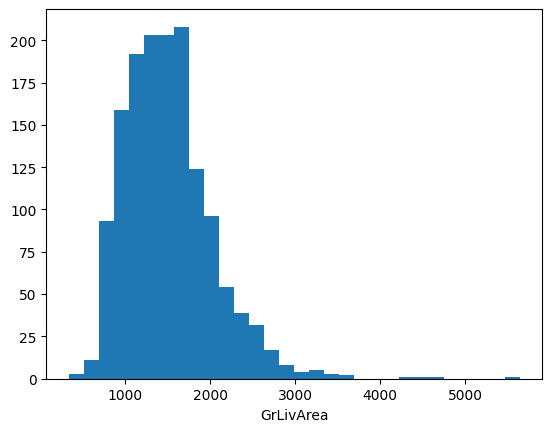

In [8]:
### HISTOGRAMS to undestand the distribution of values in the data set
# Generate interface for a graph
plt.figure()

# Draw histogram with the distribution of the variable  -> GrLivArea: habitable surface
plt.hist(train["GrLivArea"], bins=30)
plt.xlabel("GrLivArea")

Text(0.5, 0, 'GrLivArea')

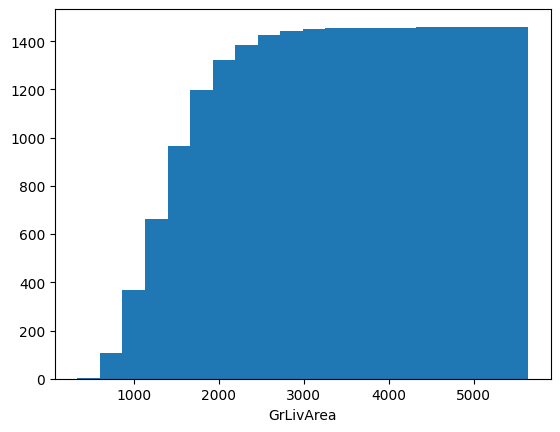

In [9]:
# Generate interface for a graph
plt.figure()

# Draw histogram with the cumulative distribution of the variable -> GrLivArea: habitable surface
plt.hist(train["GrLivArea"], bins=20, cumulative=True)
plt.xlabel("GrLivArea")

Text(0, 0.5, 'SalePrice')

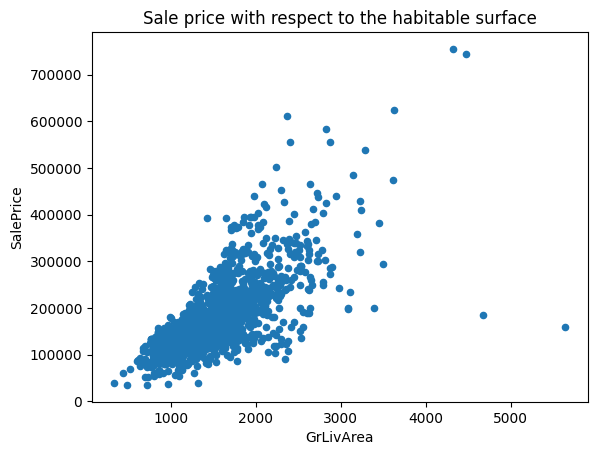

In [10]:
#### SCATTER PLOT with target, to compare the relationship between them
# Generate interface for a graph
plt.figure()
plt.title(f"Sale price with respect to the habitable surface")

# Draw the scatter plot of the variable -> GrLivArea: habitable surface and the target  SalePrice: price, target variable for prediction
plt.scatter(train["GrLivArea"], train["SalePrice"], s=20)  #s size of the marker
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

## EJERCICIO 3
Dibuja el histograma y los diagramas de dispersión para todas las variables numéricas.

Recomendación: haga un diagrama con dos subtramas en una fila y dos columnas para cada característica.

In [11]:
# Identification of numeric columns
num_features = train.columns[train.dtypes != "object"]
print(num_features)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


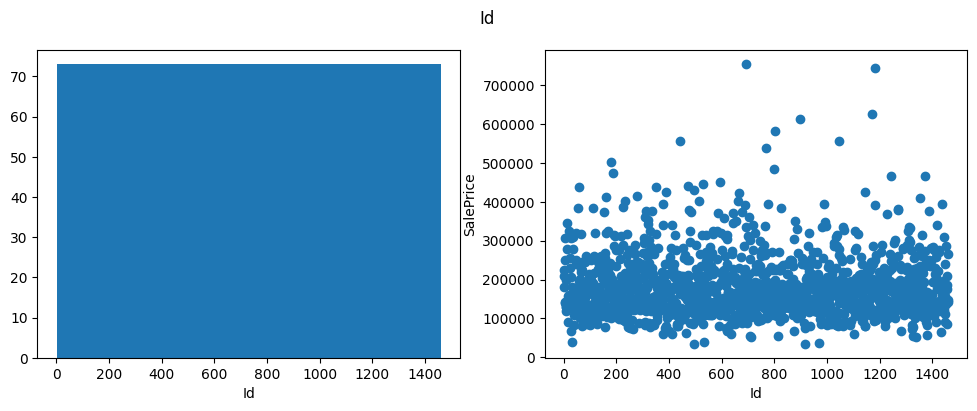

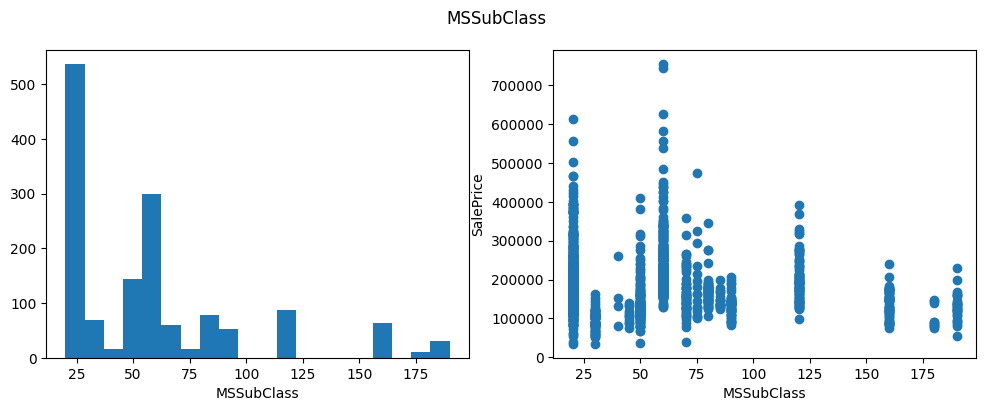

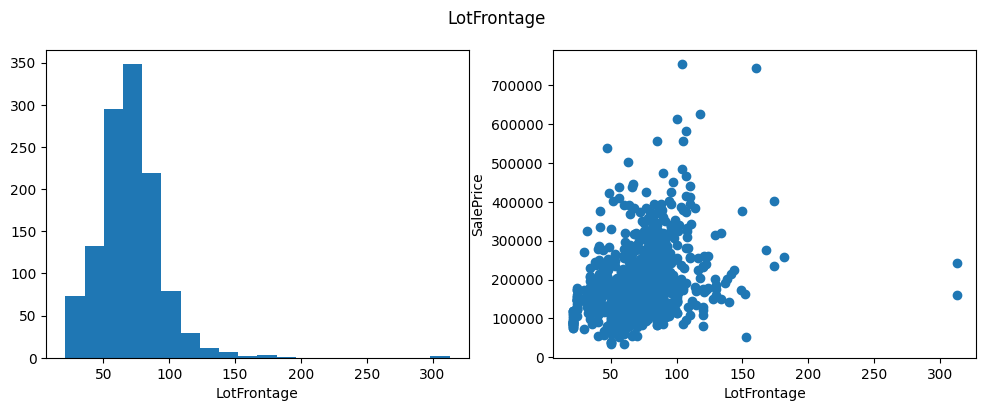

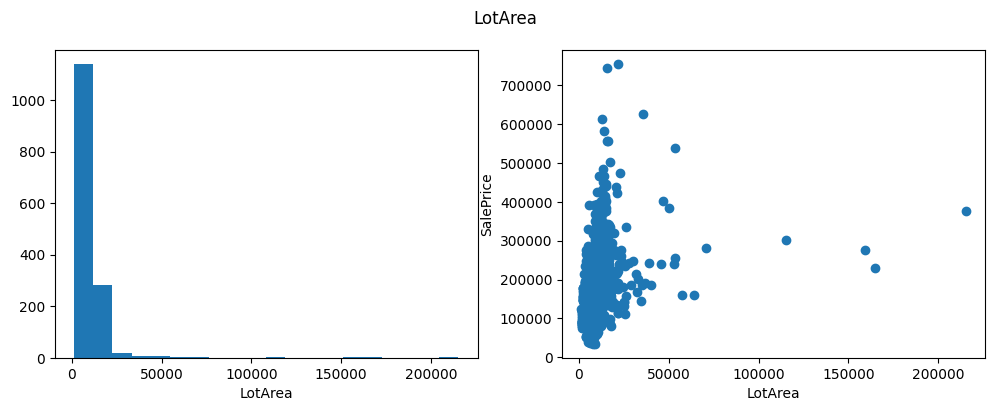

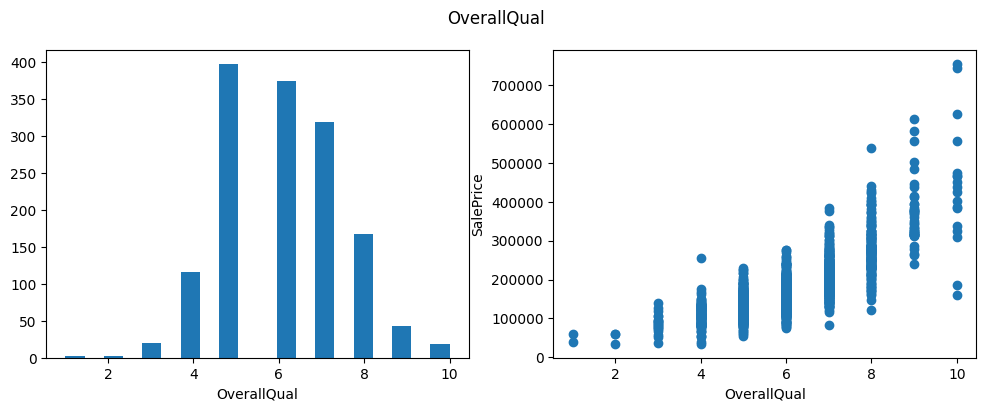

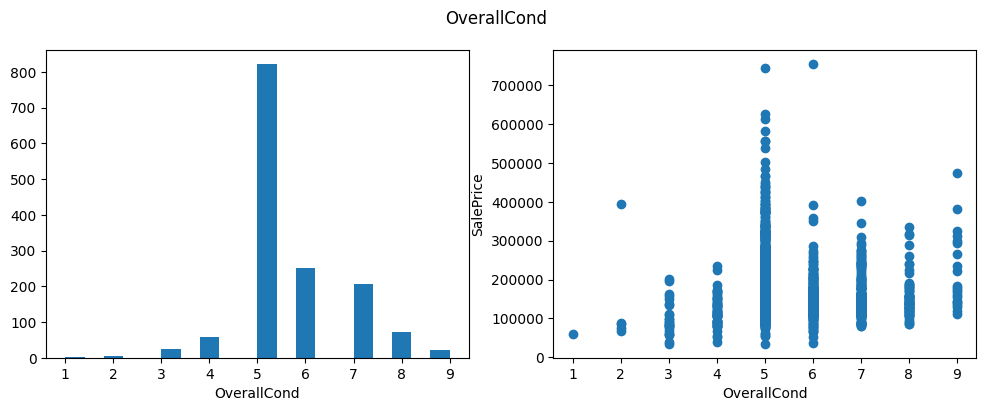

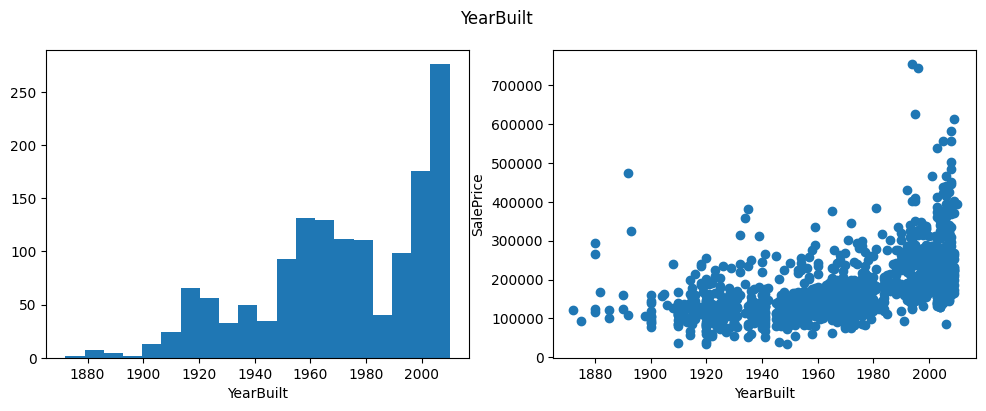

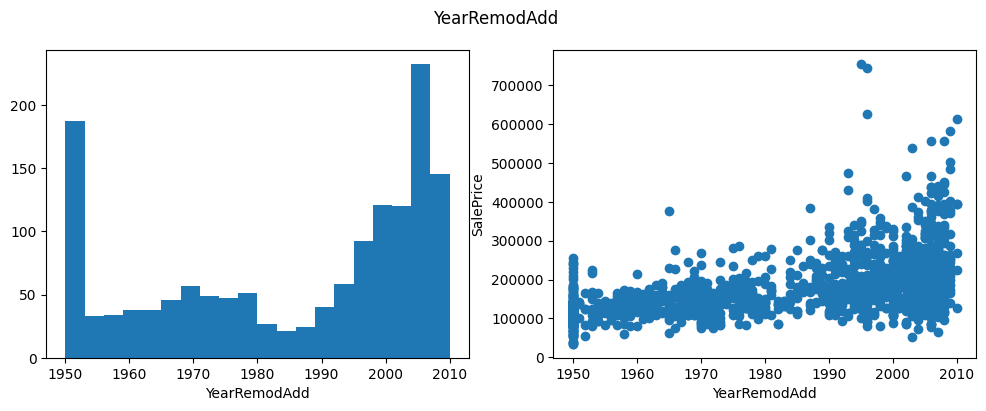

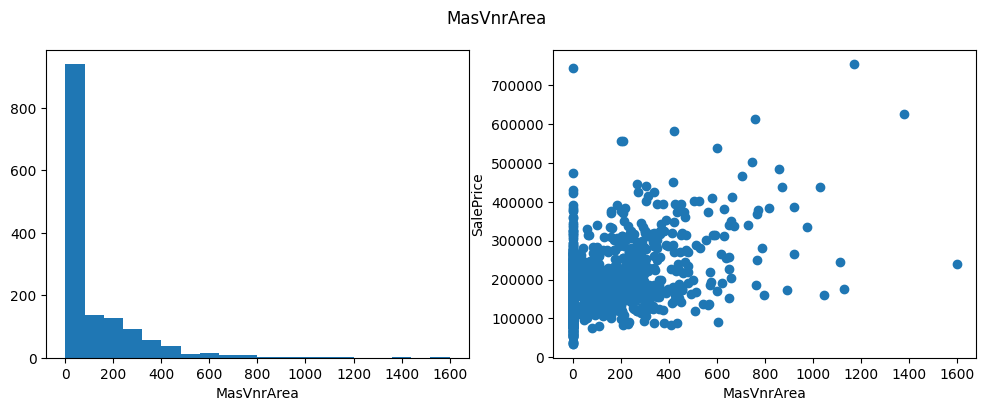

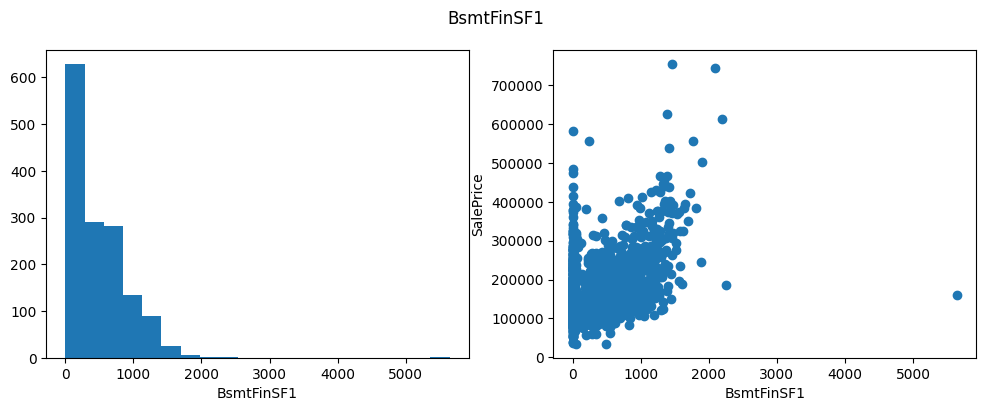

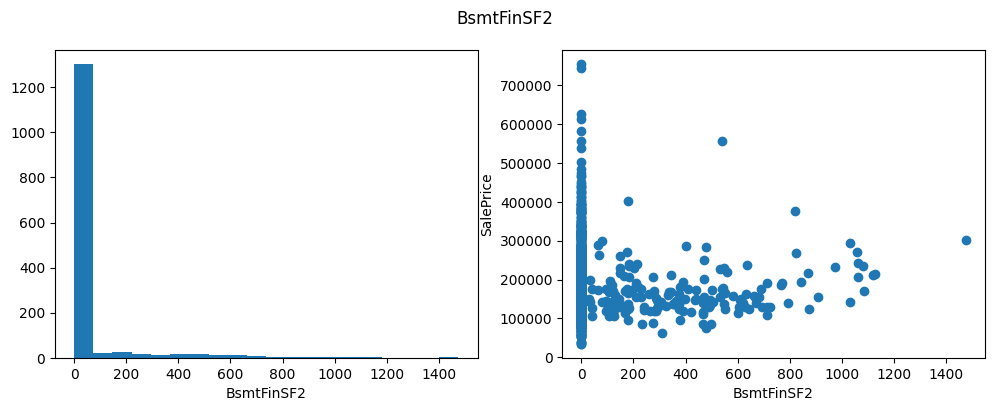

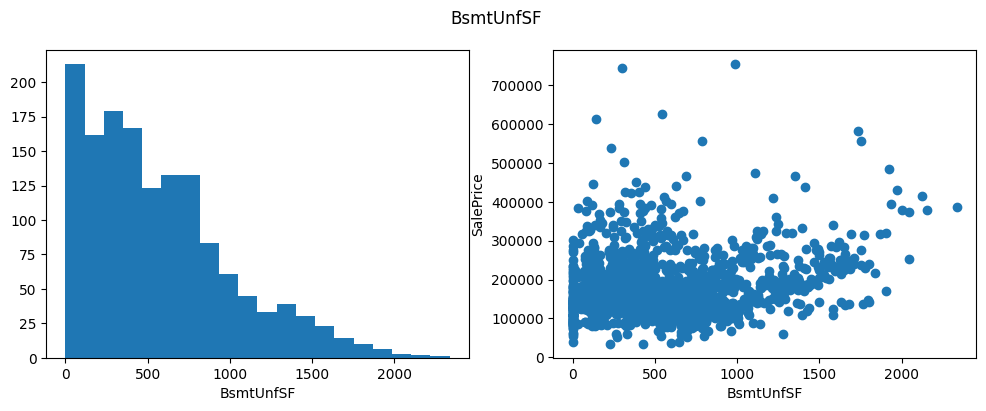

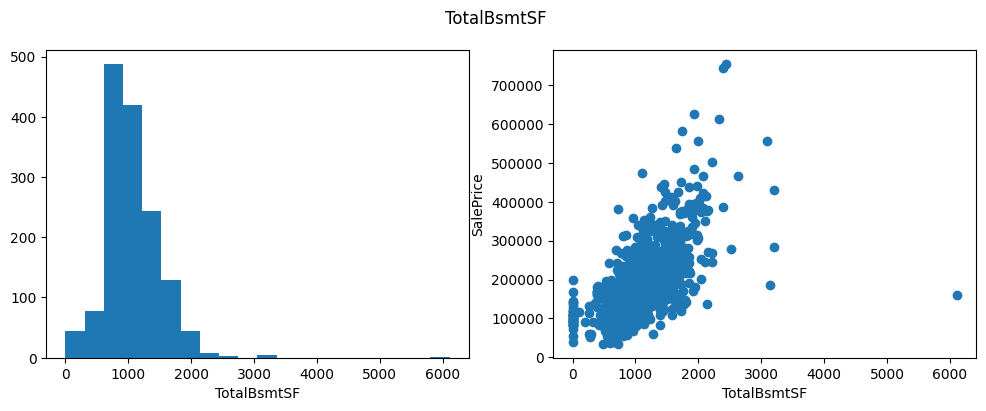

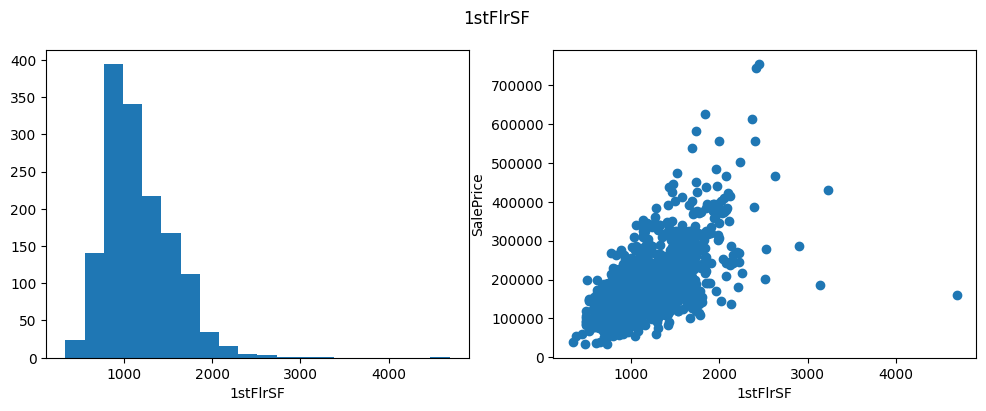

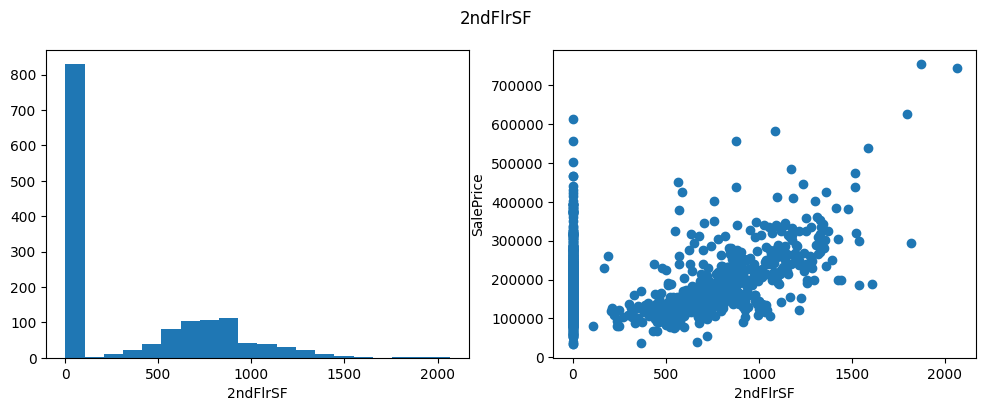

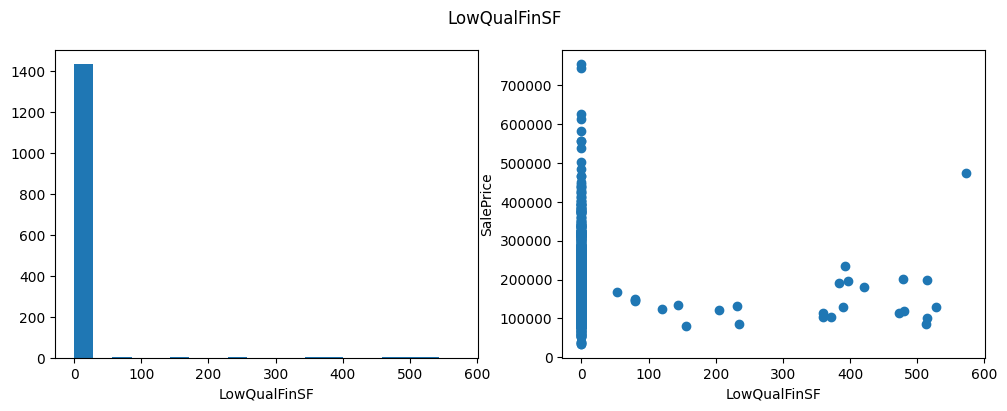

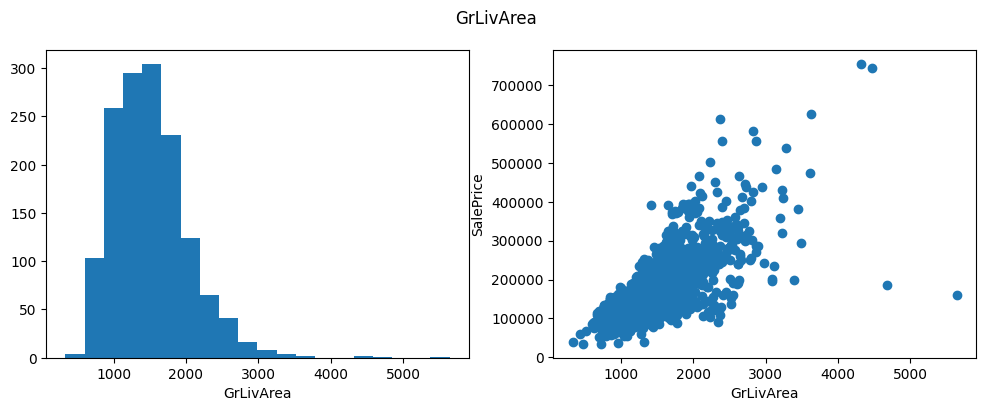

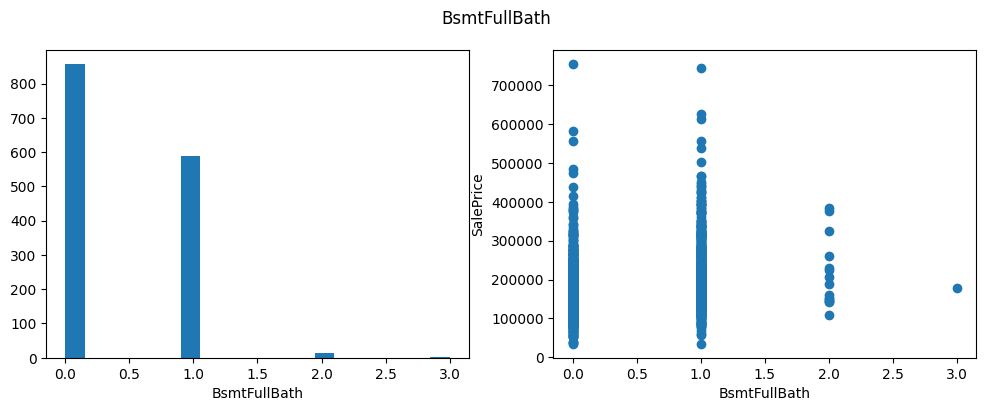

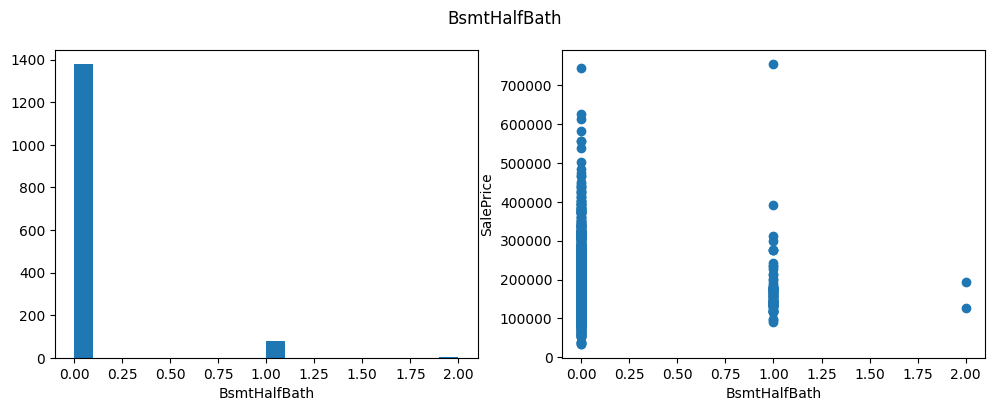

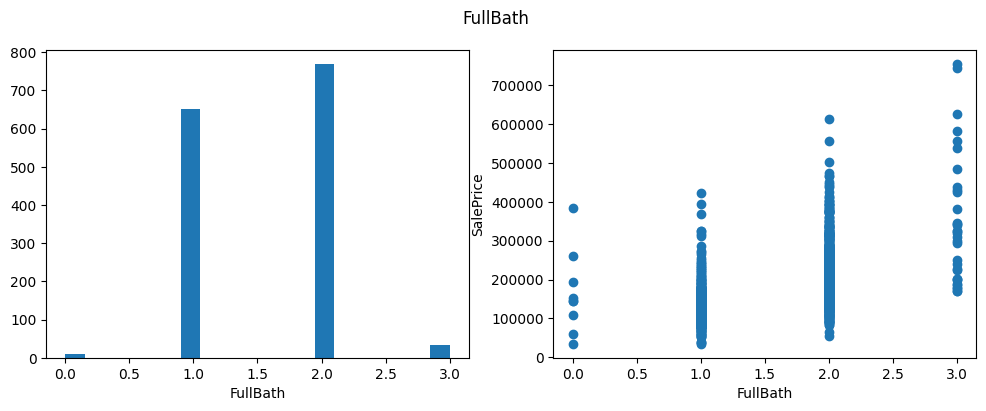

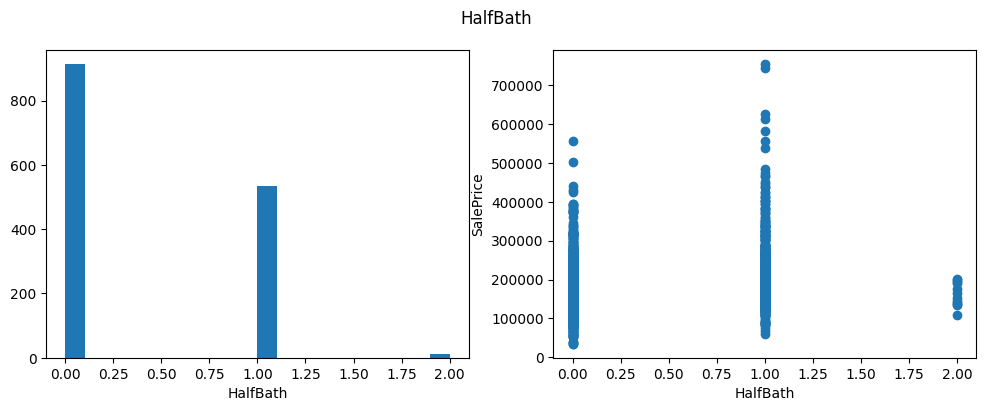

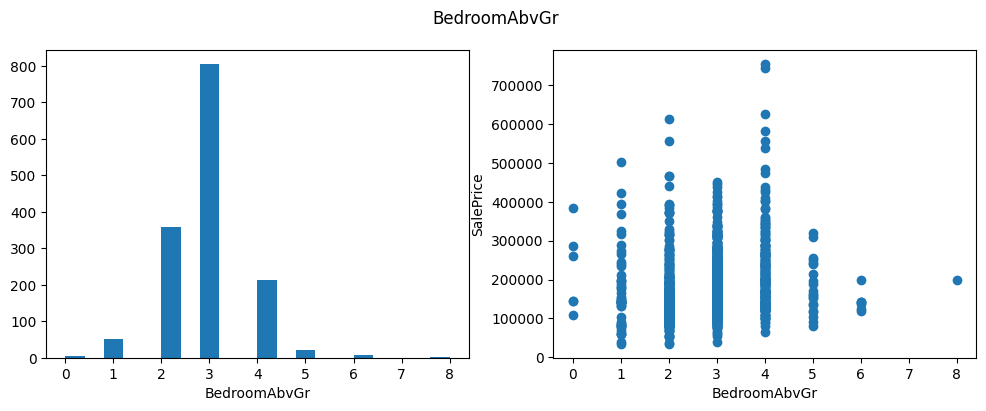

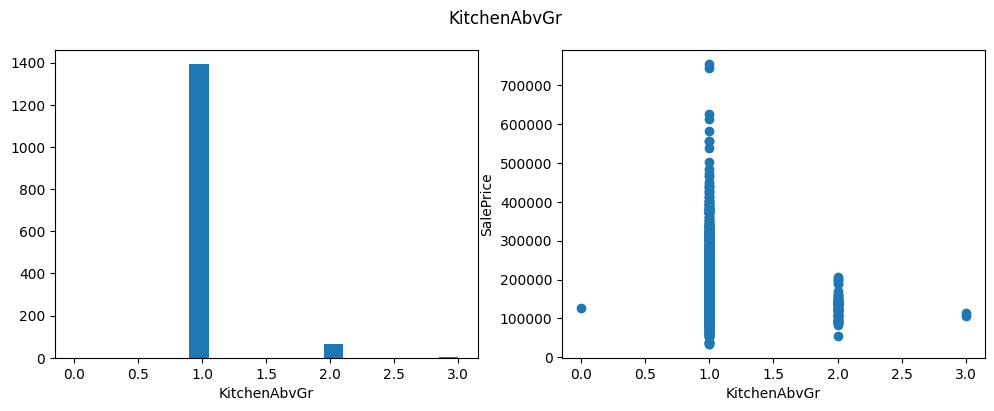

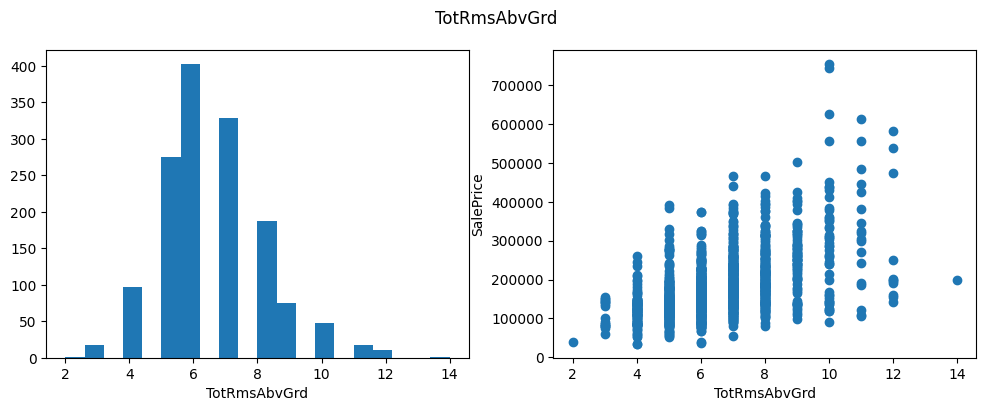

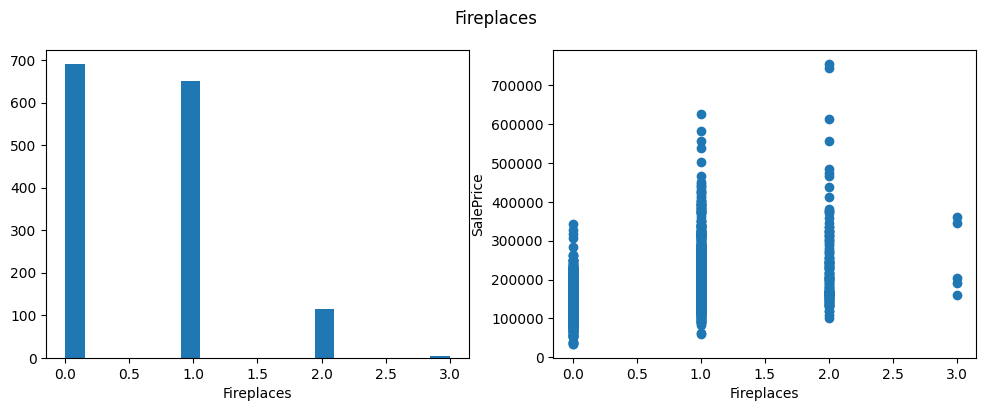

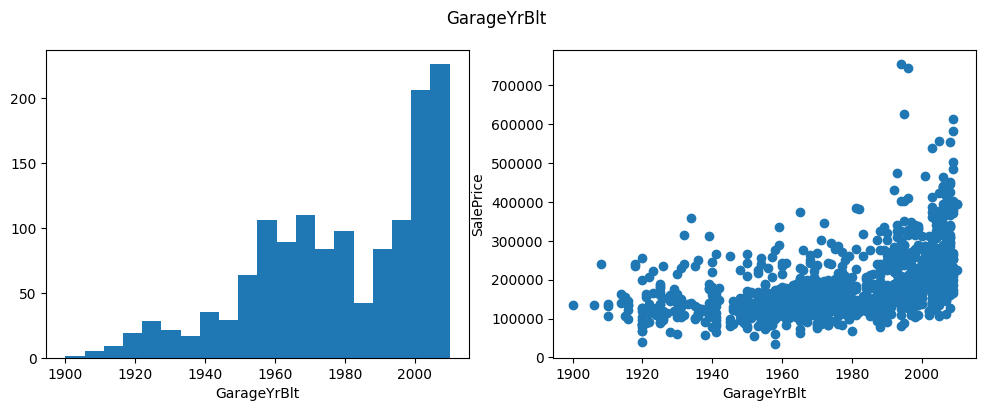

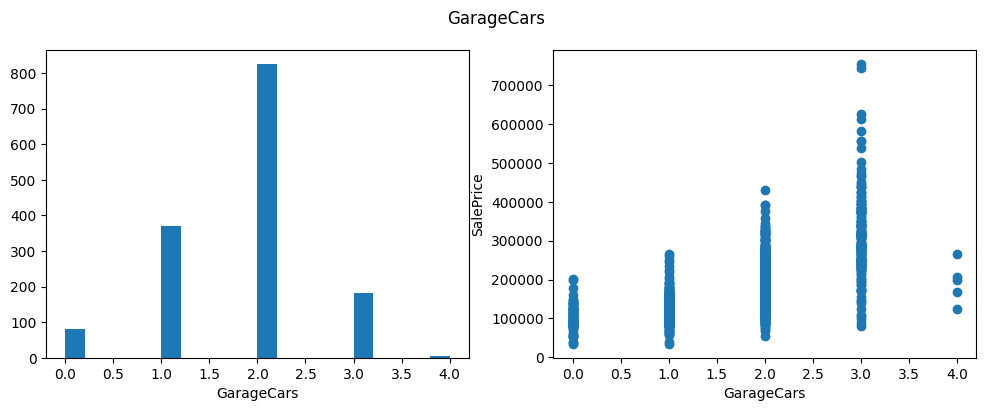

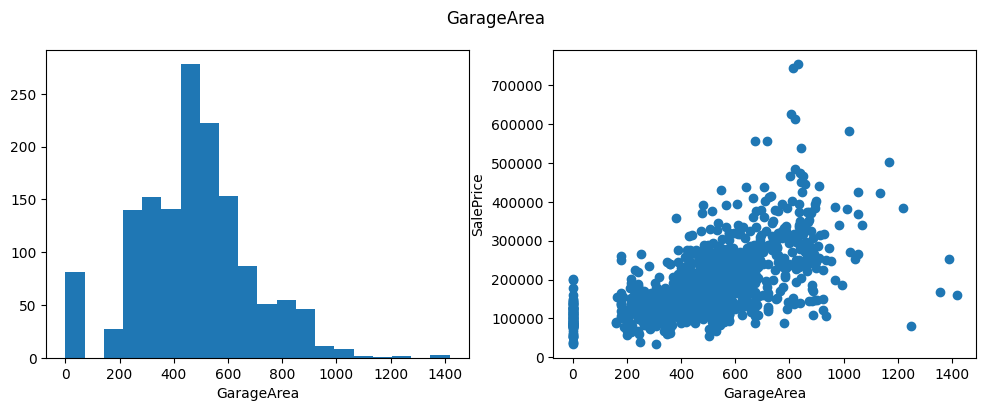

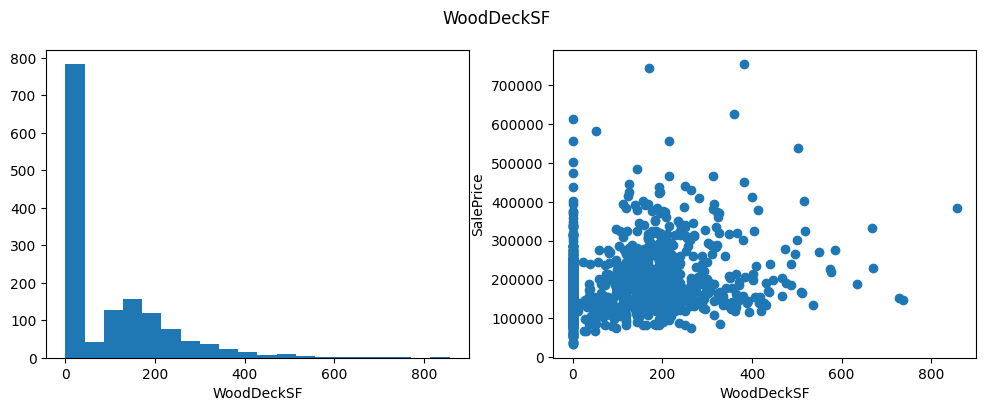

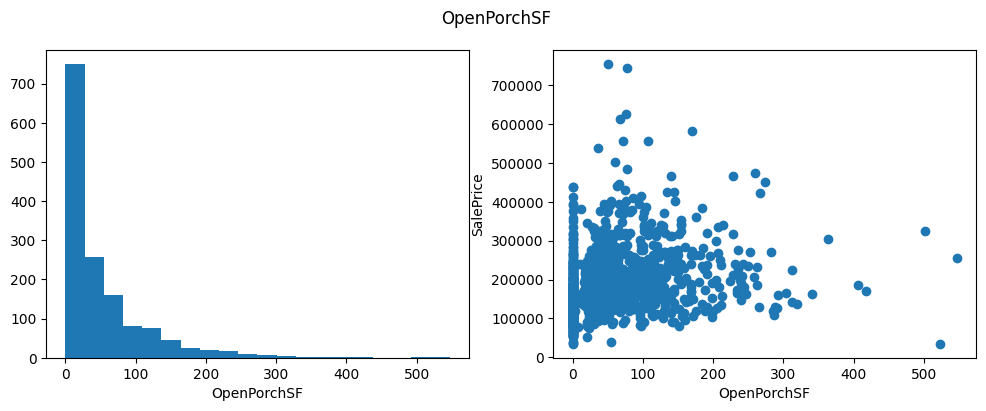

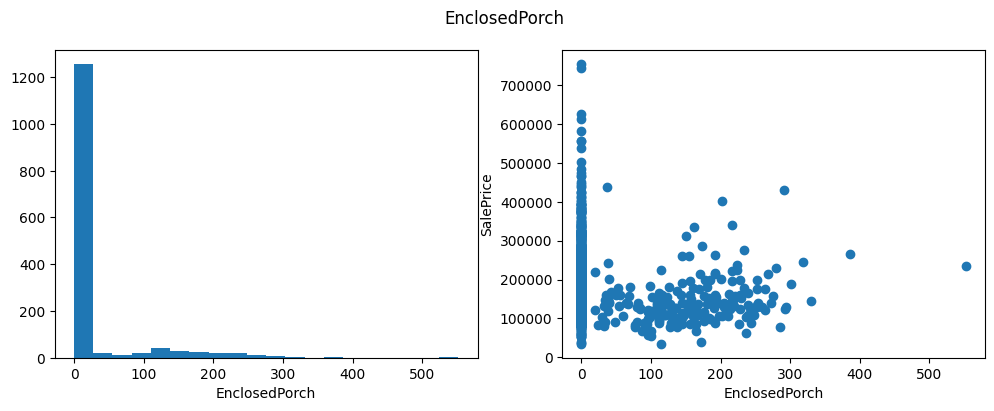

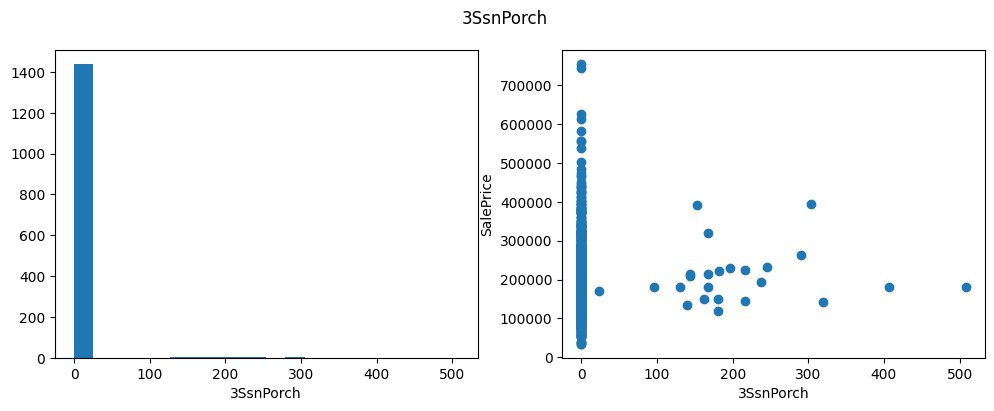

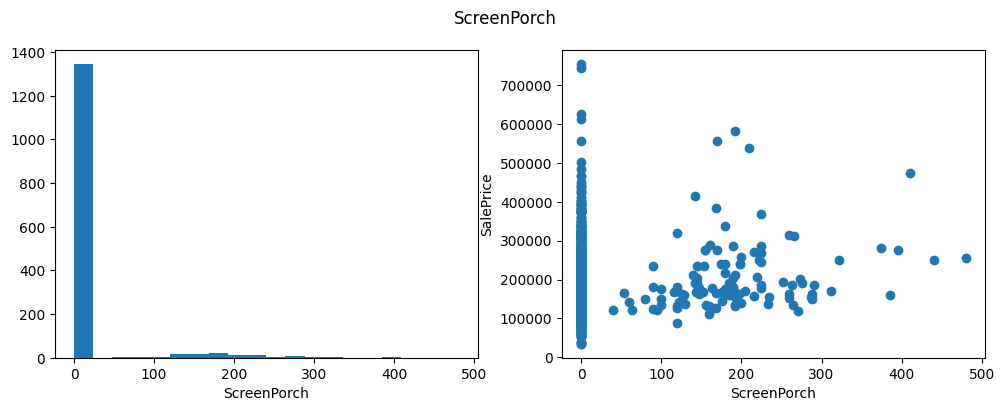

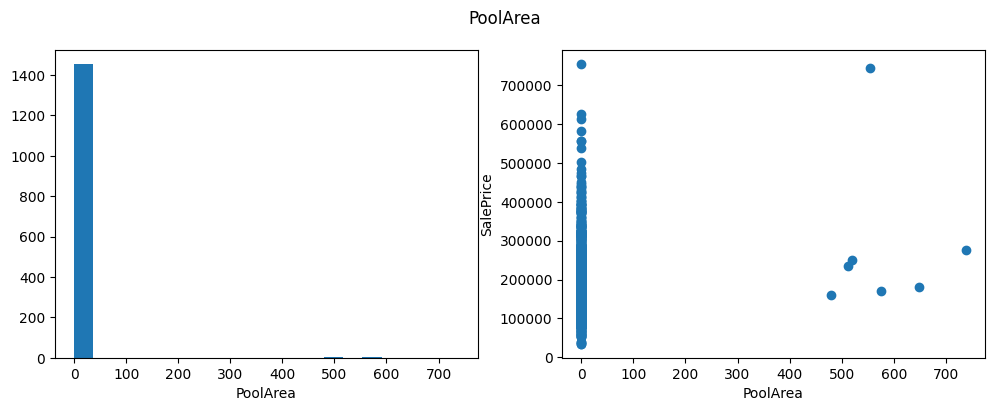

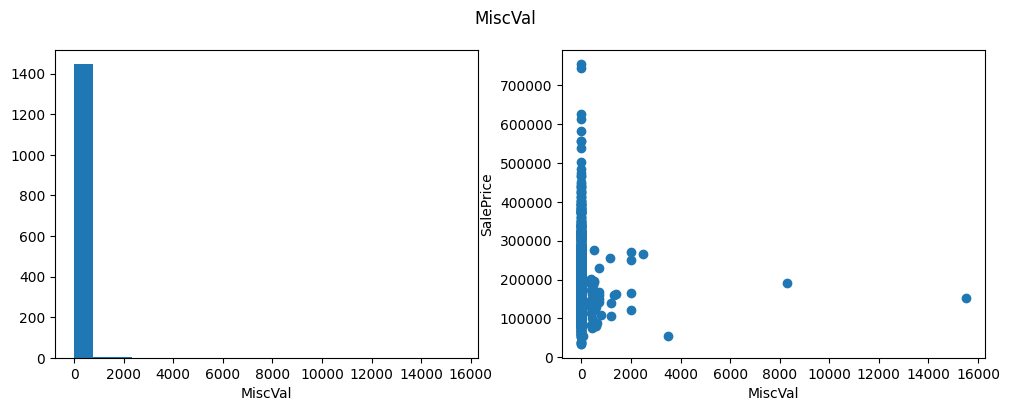

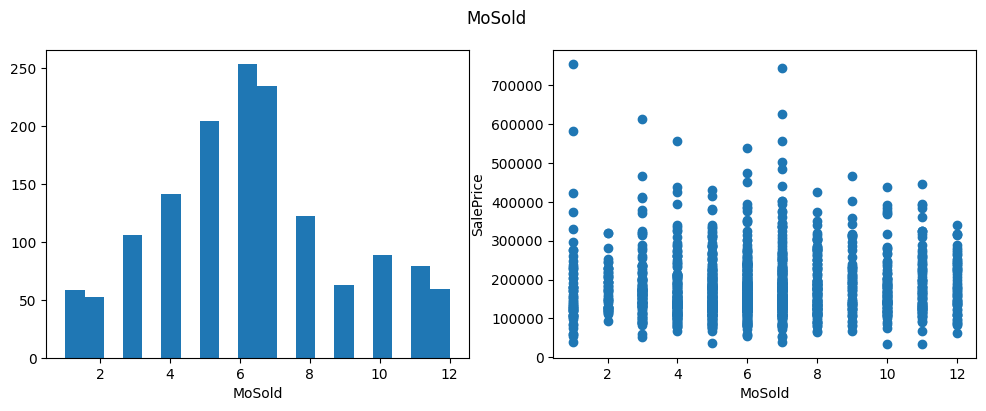

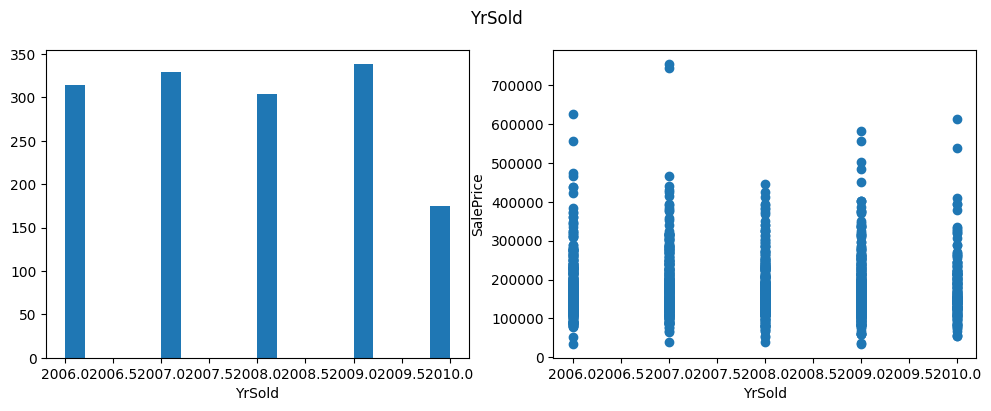

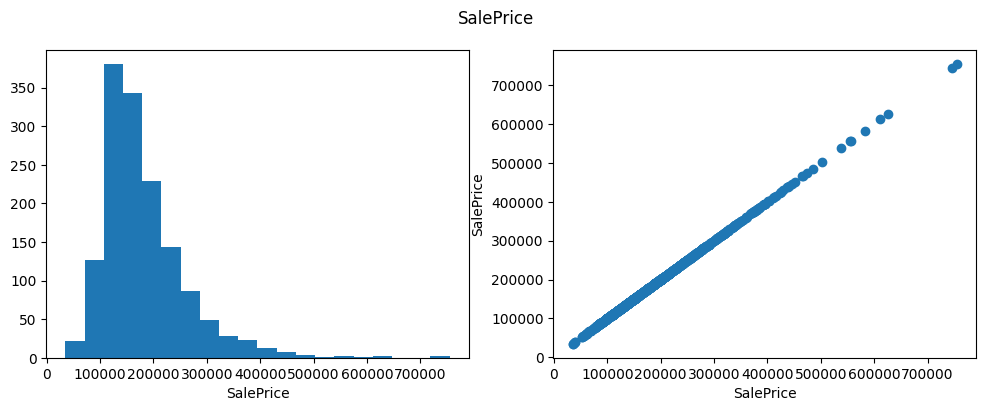

In [12]:
target = "SalePrice"
y = train[target]

# For each numeric variable...
for col in num_features:
    # Determinamos los datos en los que nos centraremos
    x = train[col]

    # Generamos la interfaz para dos gráficos
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(col)

    # Dibujar a la izquierda el histograma con la distribución de la variable
    axs[0].hist(x.dropna(), bins=20) # Usamos .dropna() para ignorar NaN y evitar errores
    axs[0].set_xlabel(col)

    # Dibujar el scatterplot a la derecha con la interacción entre la variable de interés y la variable respuesta
    # Usamos .scatter para el gráfico de dispersión
    axs[1].scatter(x, y)
    axs[1].set_xlabel(col)
    axs[1].set_ylabel(target)

    # show visualization
    plt.show()

### EJERCICIO 4
Utilice el método .describe() para ver la descripción estadística de las características numéricas del DataFrame de train.csv

In [13]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### Exploración de características categóricas

Normalmente exploramos las características categóricas que mostramos:

- El gráfico de barras de los recuentos de muestras en cada categoría, para ver si el conjunto de datos está equilibrado en todas las categorías.

- El gráfico de barras de los valores objetivo para cada categoría, para ver cómo varía el objetivo con respecto a las categorías.

In [14]:
# Determine data to focus on  -> BldgType:Type of dwelling
df_counts = train.groupby("BldgType")['Id'].count()
x = df_counts.index.tolist()
h = df_counts.values.tolist()
print(x)
print(h)

['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE']
[1220, 31, 52, 43, 114]


Text(0, 0.5, 'Num cases')

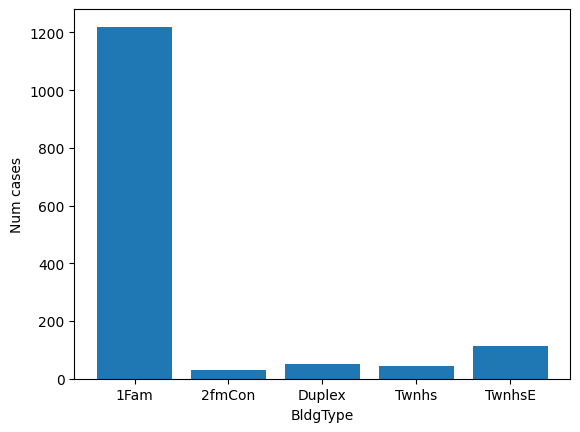

In [15]:
# Generate interface for a graph
plt.figure()

# Dibuje el gráfico de barras con los recuentos a la izquierda.
plt.bar(x, h)
plt.xlabel('BldgType')
plt.ylabel('Num cases')

In [16]:
# Determine data to focus on -> Mean price per BldgType:Type of dwelling
df_mean_target = train.groupby("BldgType")['SalePrice'].mean()
x = df_mean_target.index.tolist()
h = df_mean_target.values.tolist()

# Get data deviation (standard deviation)
df_std_target = train.groupby("BldgType")['SalePrice'].std()
errbar = df_std_target.values.tolist()

print(x)
print(h)
print(errbar)

['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE']
[185763.80737704918, 128432.25806451614, 133541.07692307694, 135911.62790697673, 181959.34210526315]
[82648.50292180454, 35458.54515813054, 27833.249196899596, 41013.222079983665, 60626.108918361584]


Text(0, 0.5, 'Mean SalePrice')

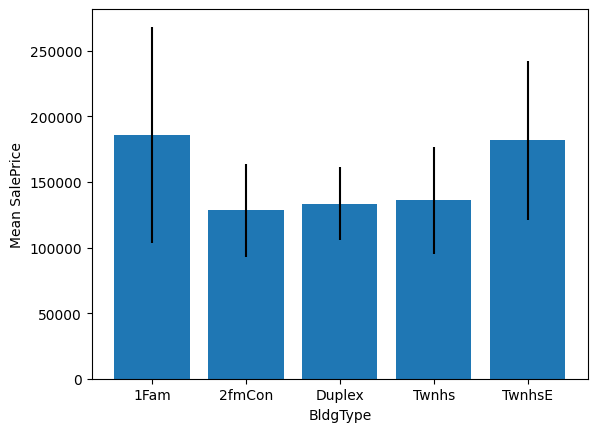

In [17]:
# Generate interface for a graph
plt.figure()

# Dibuje el gráfico de barras con la interacción entre categorías y el objetivo promedio con información de desviación estándar
plt.bar(x, h, yerr=errbar)
plt.xlabel("BldgType")
plt.ylabel("Mean SalePrice")

## EJERCICIO 5

Dibuja en gráficos de barras el recuento de muestras y de valores objetivo para todas las variables categóricas.

Recomendación: haga un grafico con dos subplots en una fila y dos columnas para cada característica.

In [18]:
# Identification of categoric columns
cat_features = train.columns[train.dtypes == "object"]
print(cat_features)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


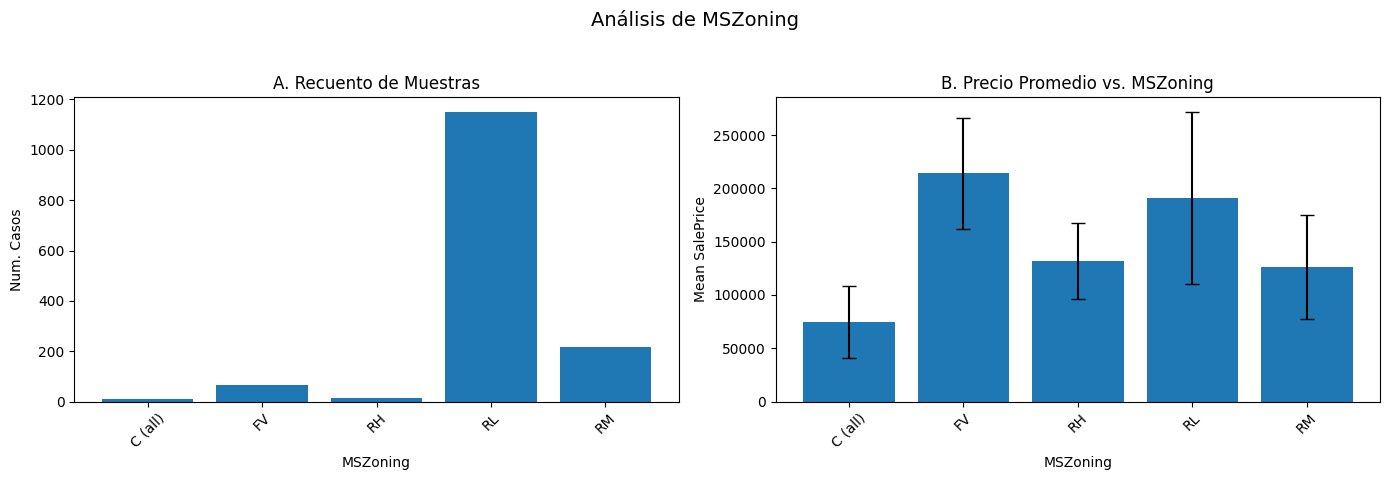

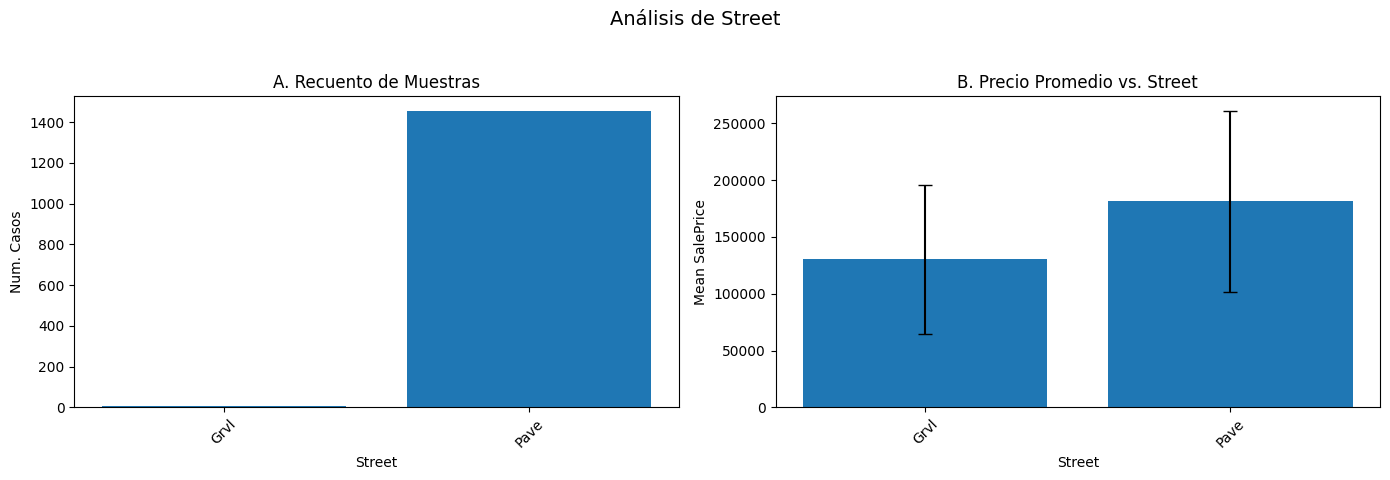

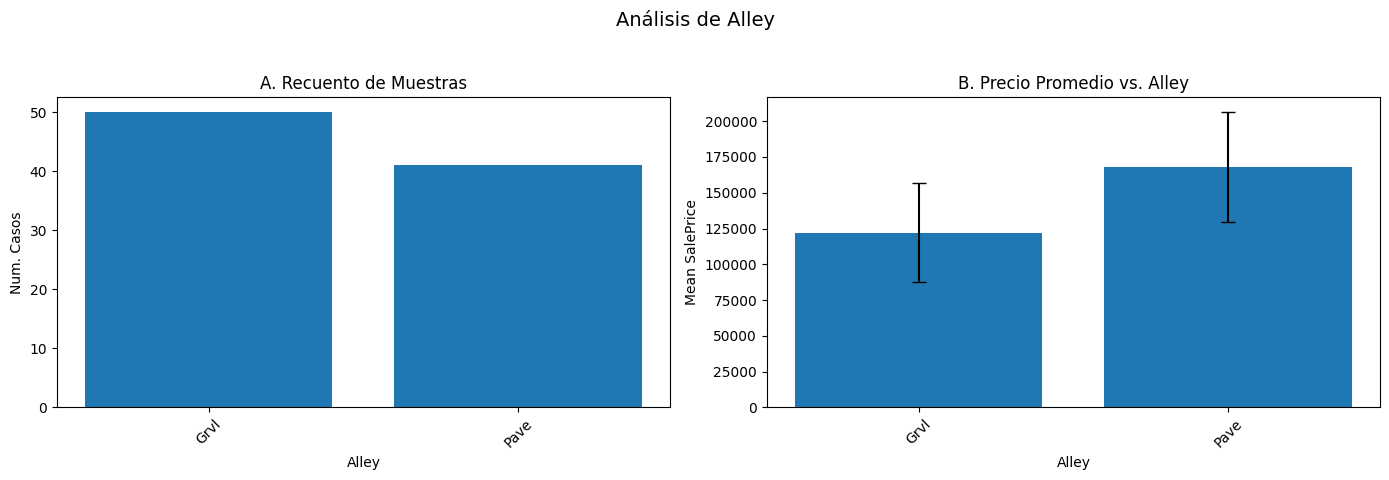

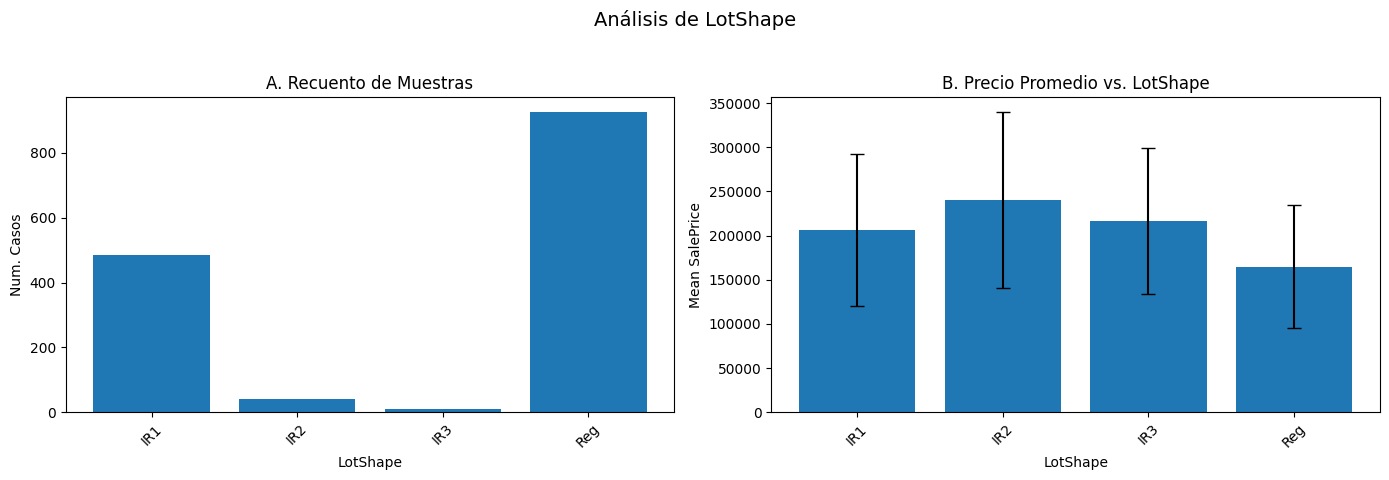

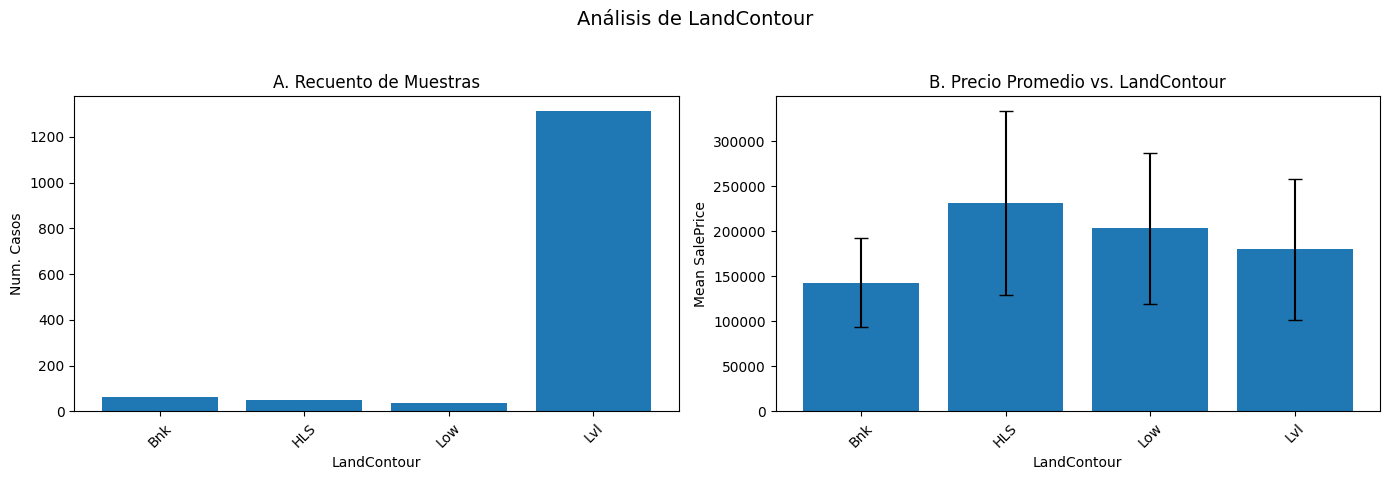

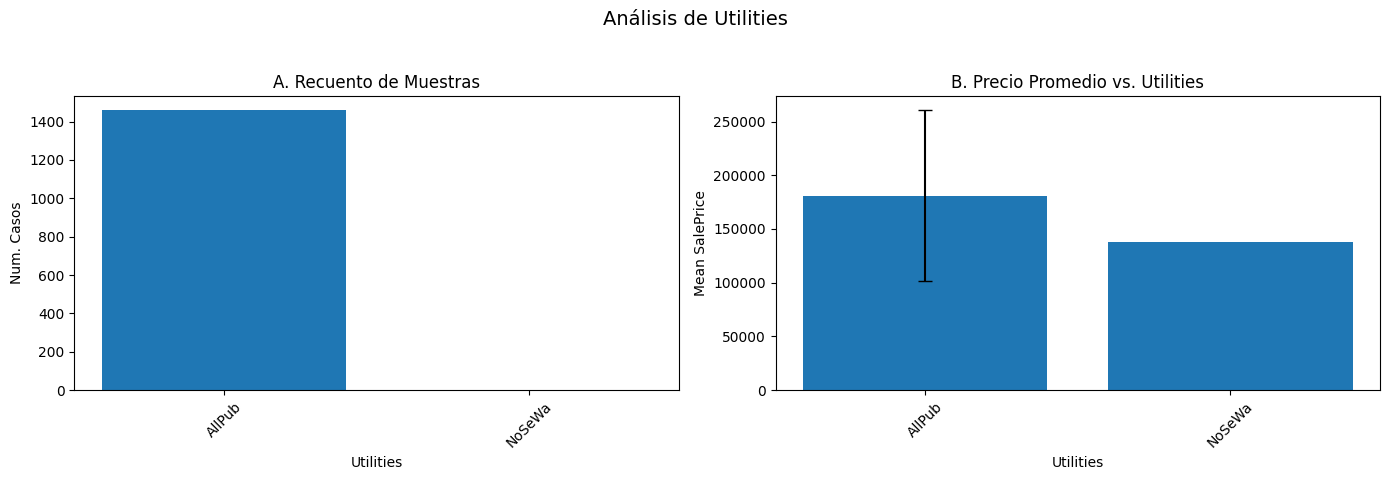

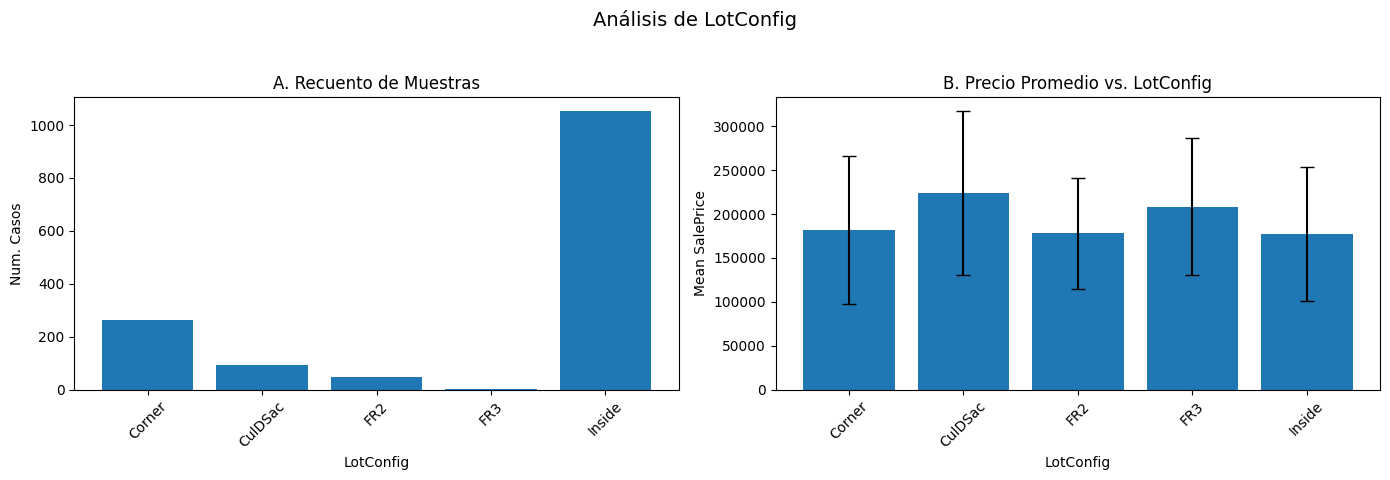

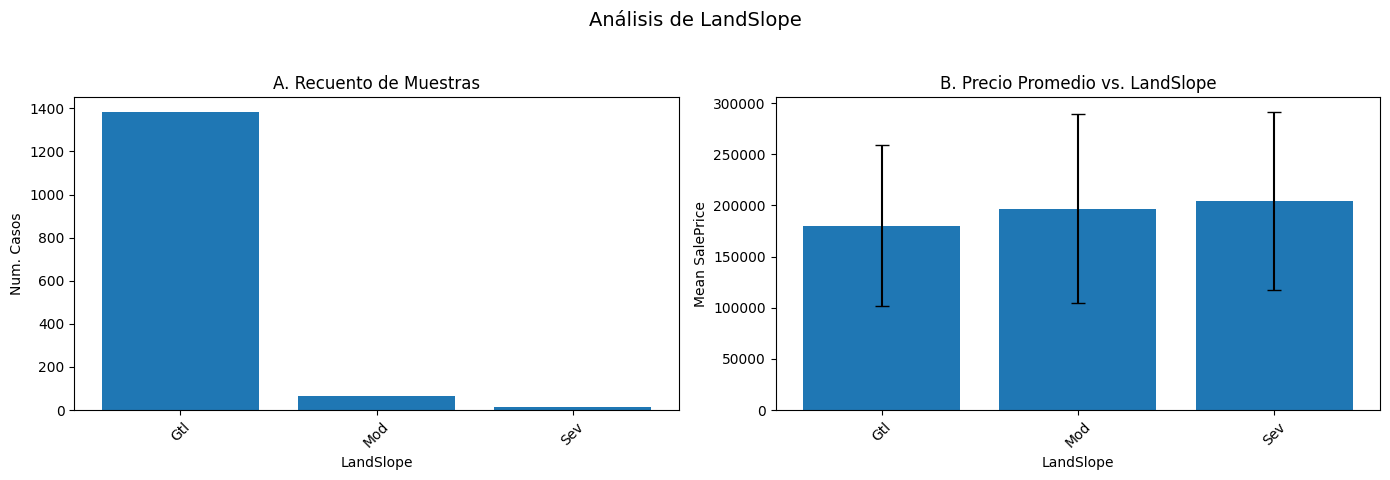

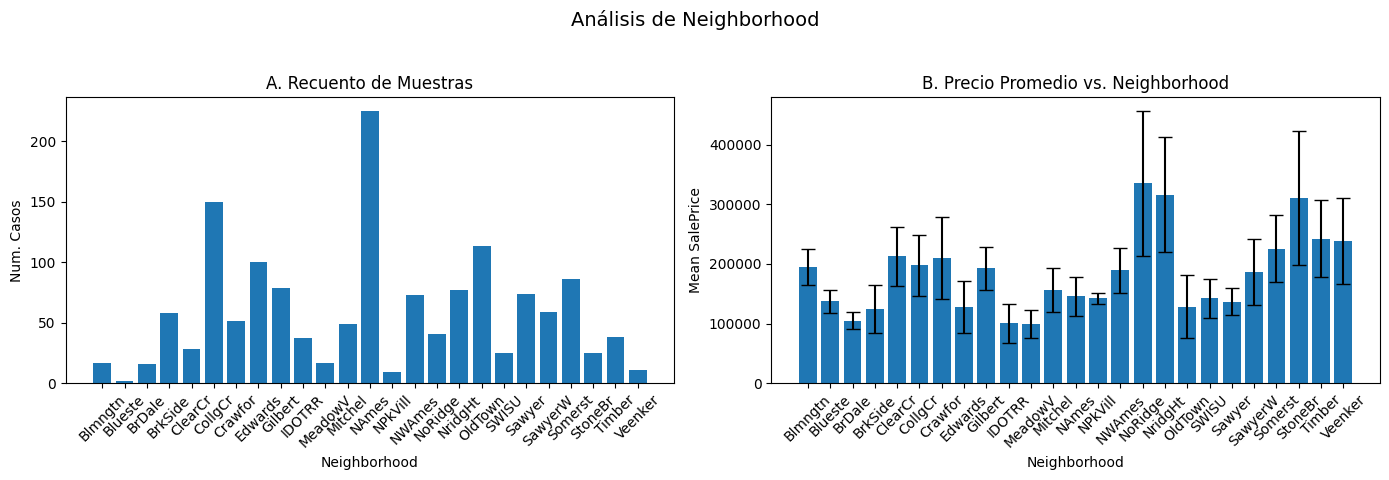

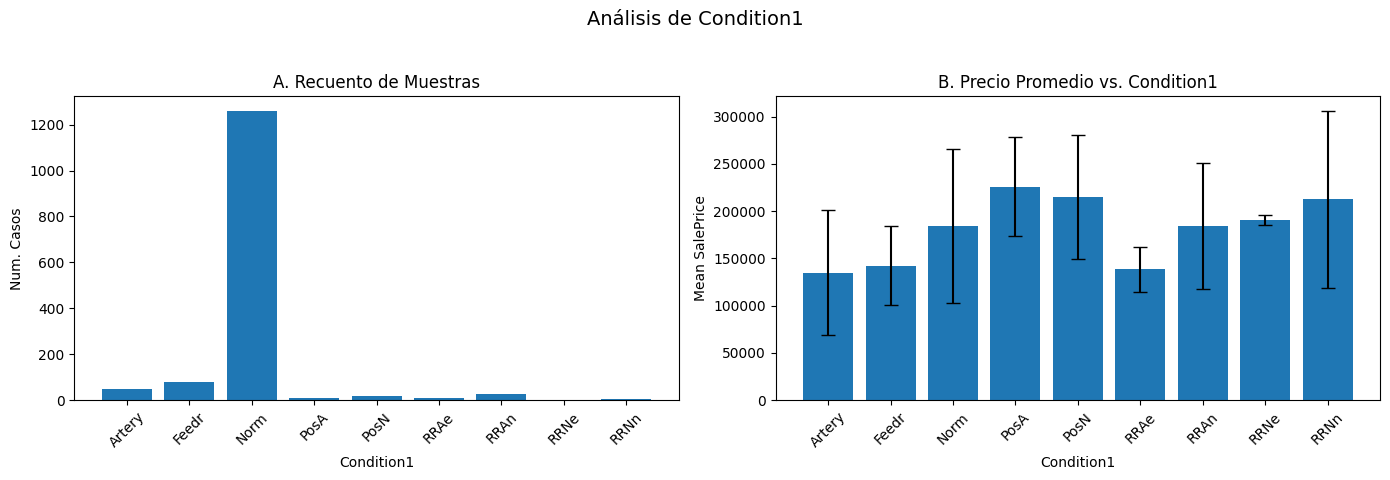

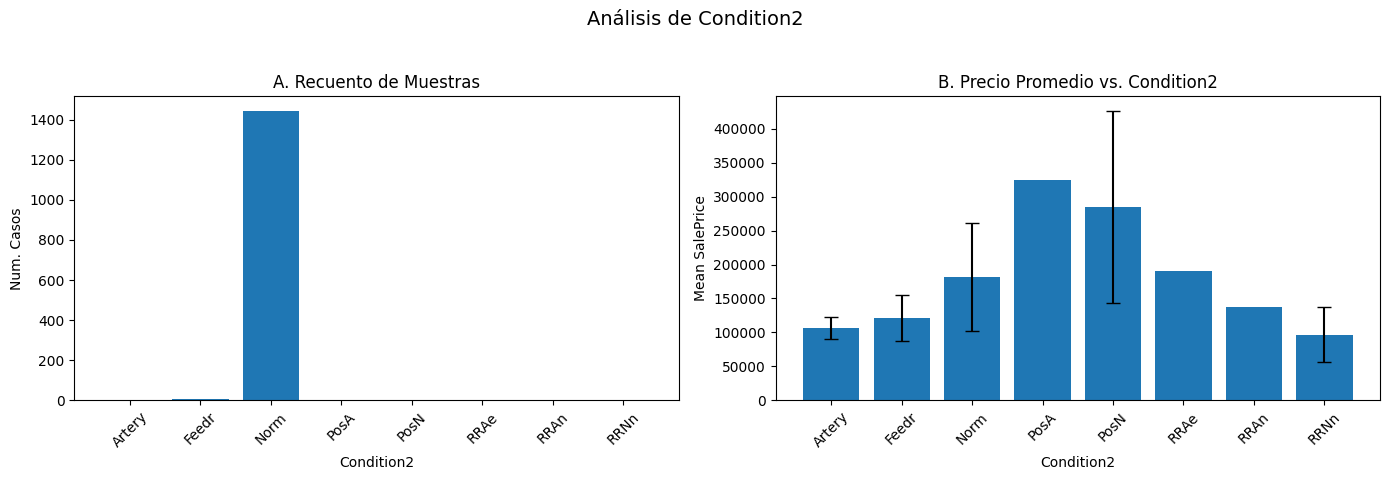

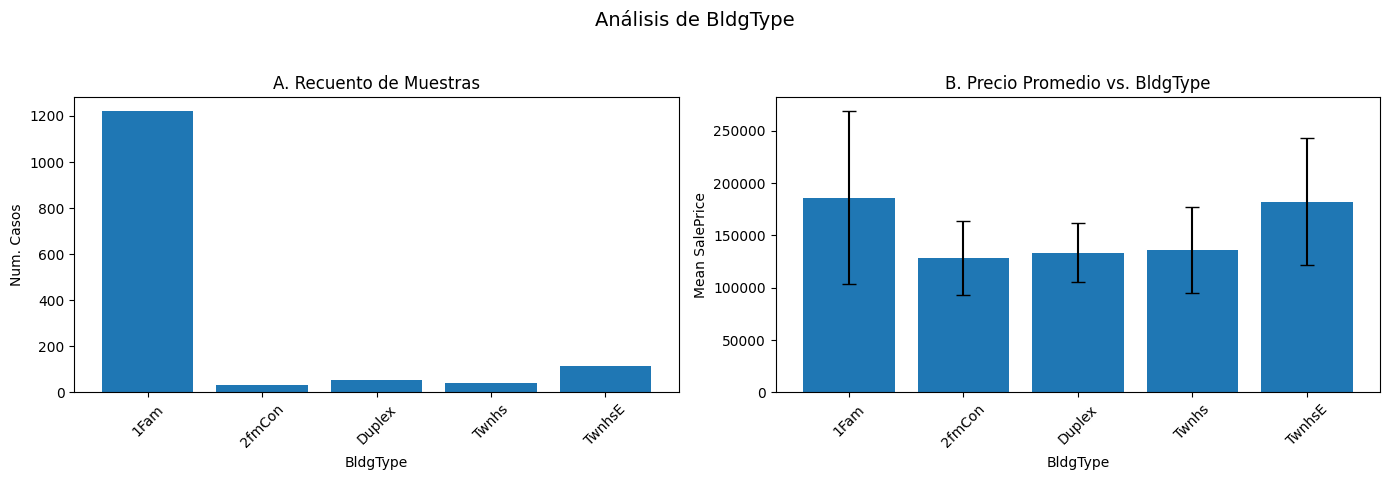

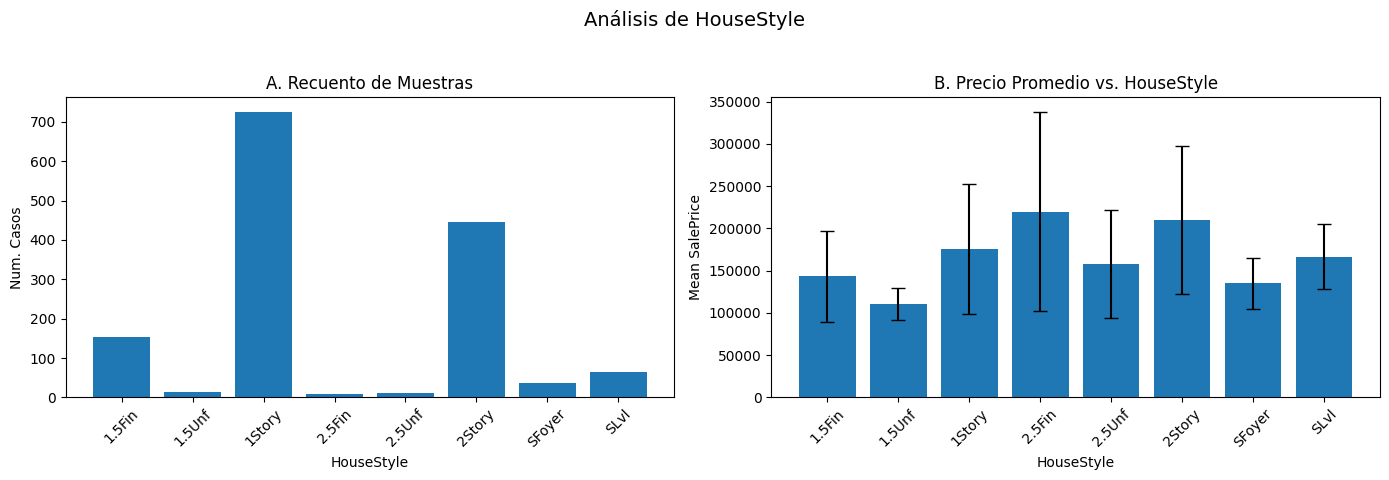

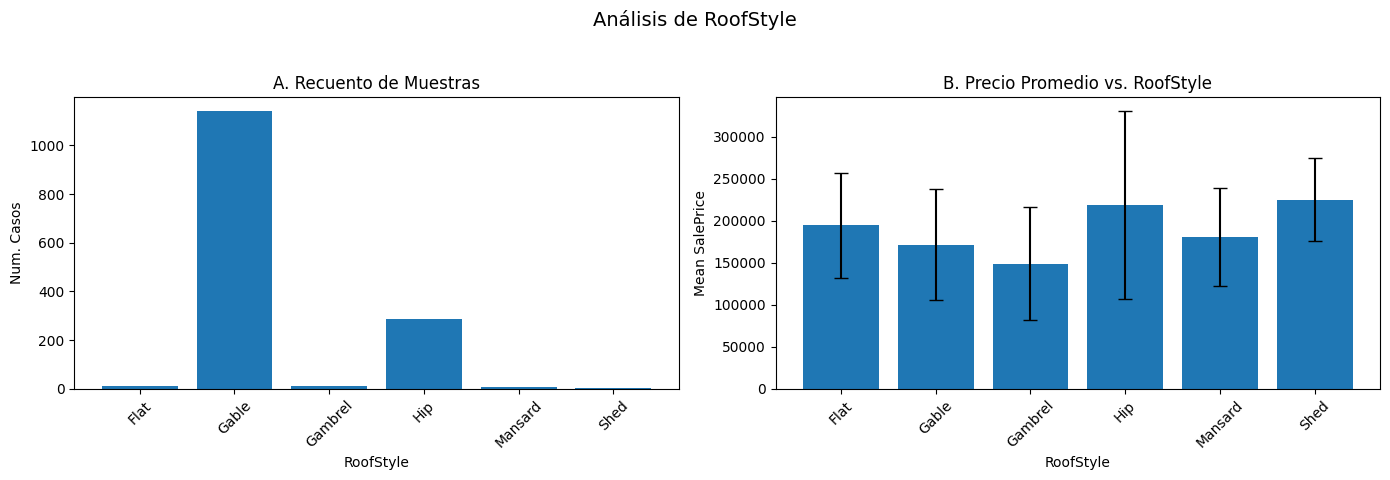

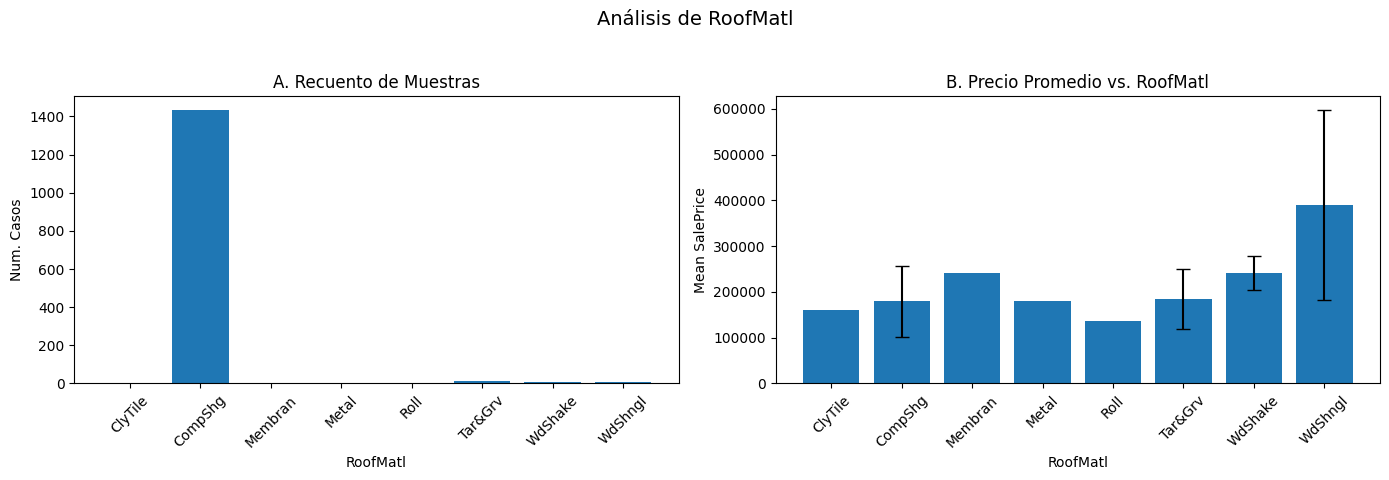

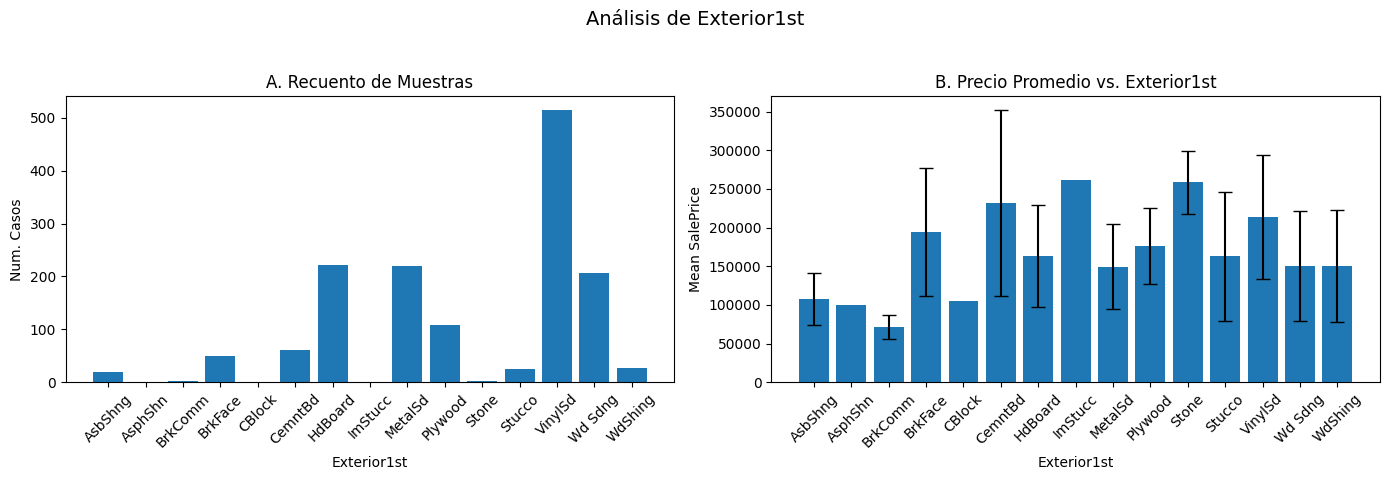

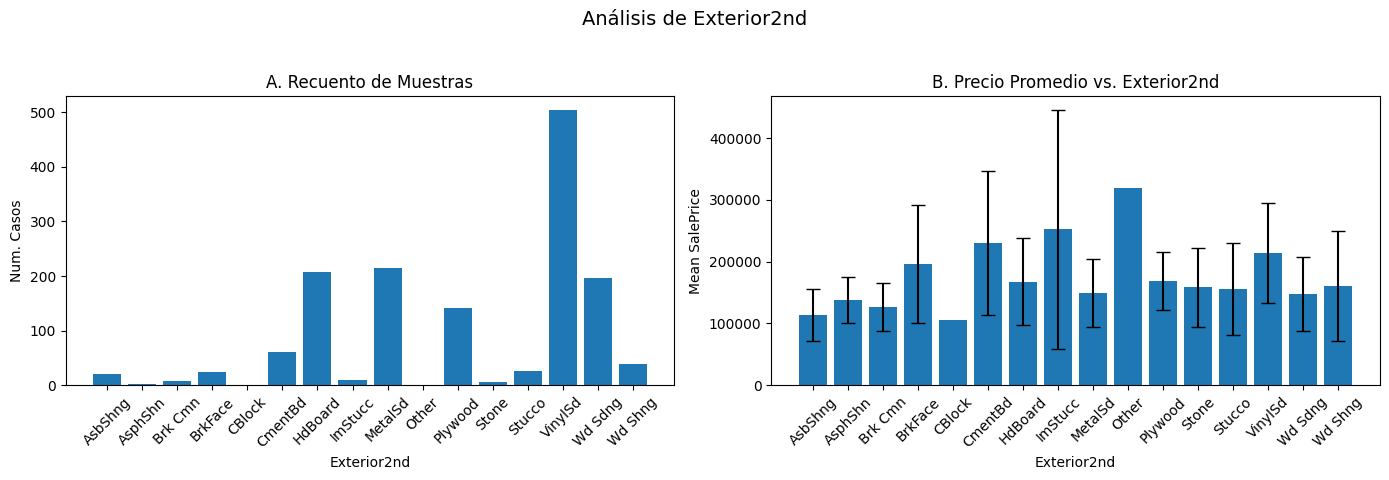

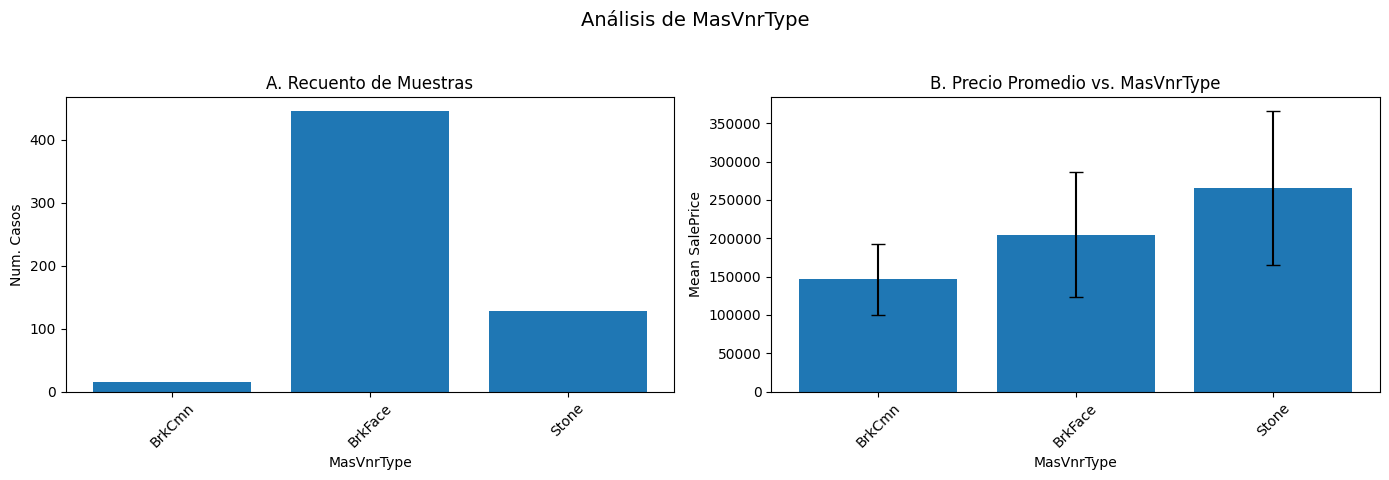

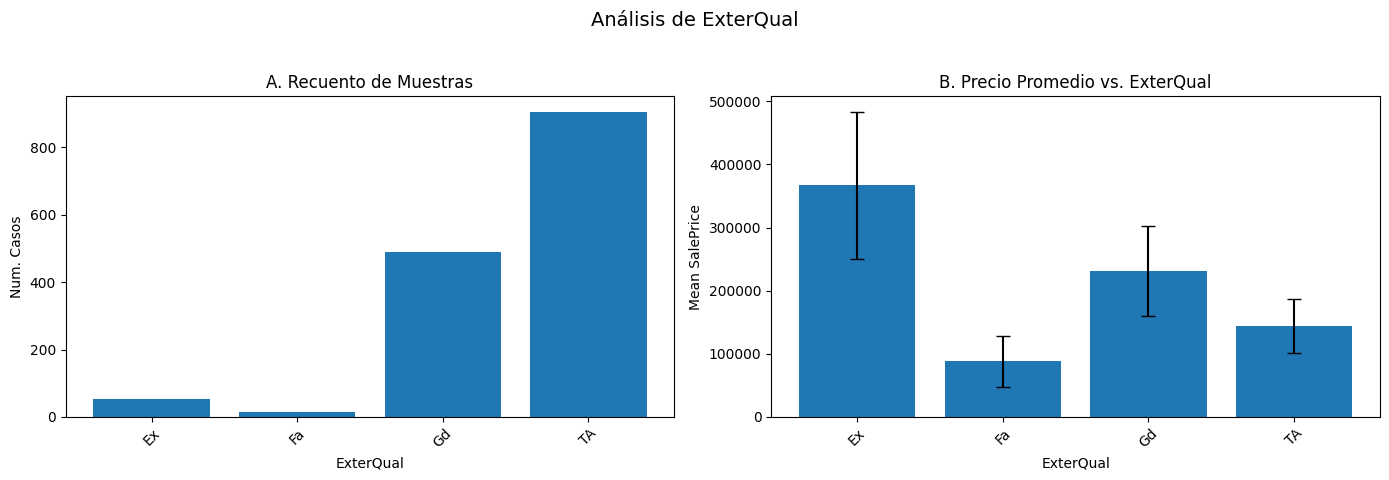

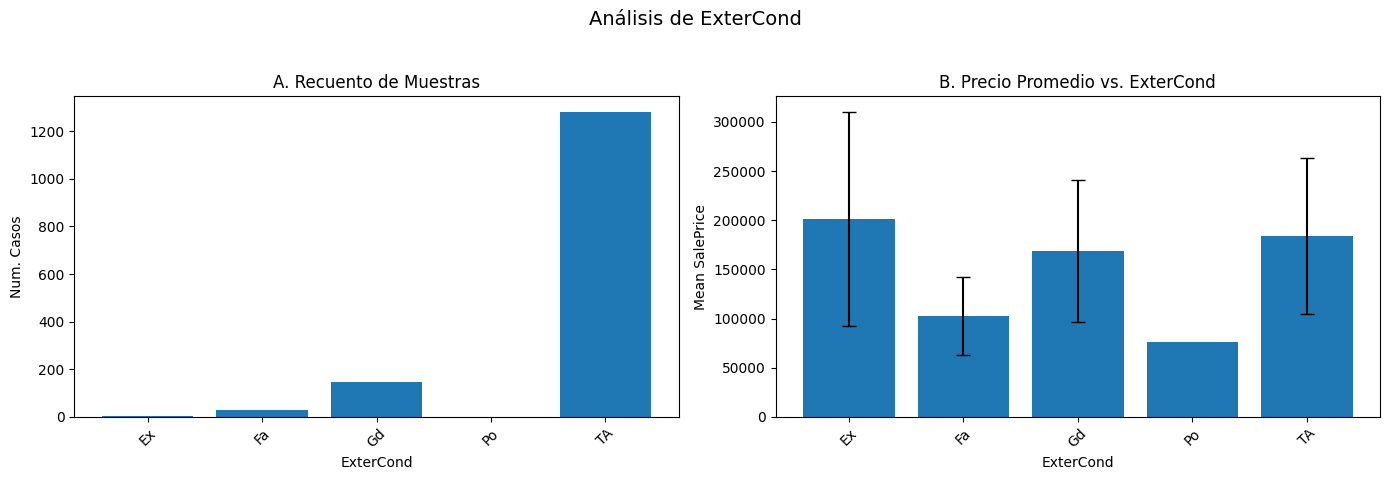

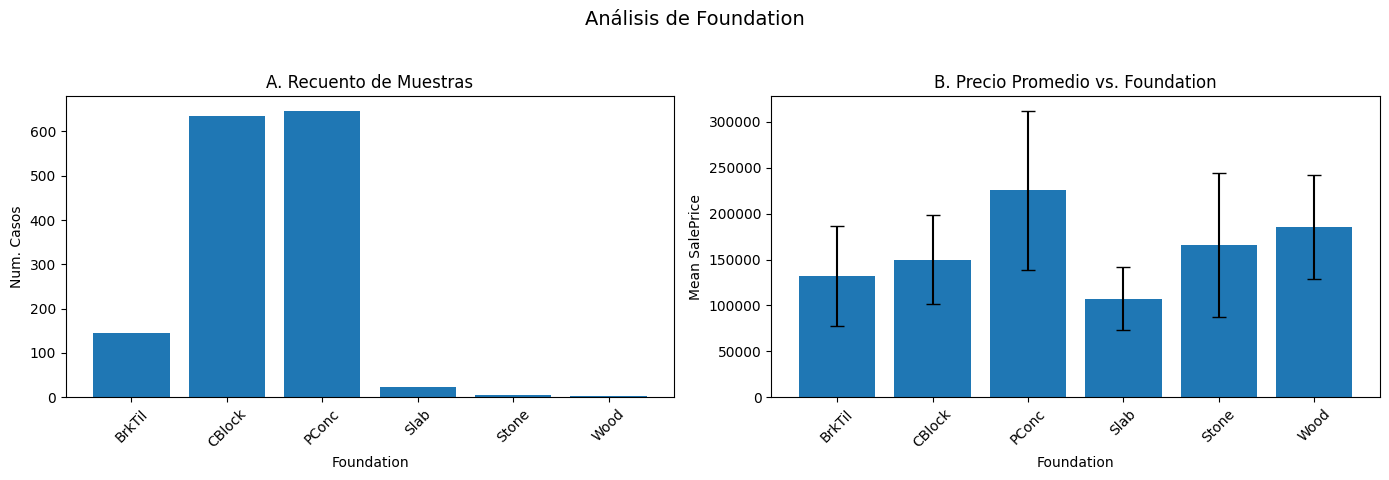

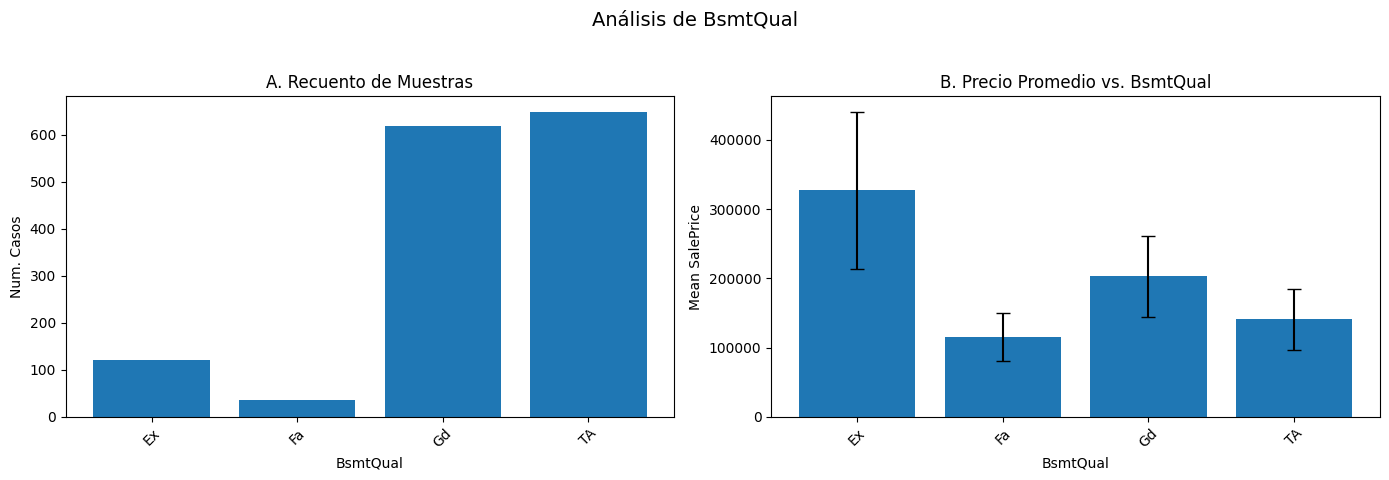

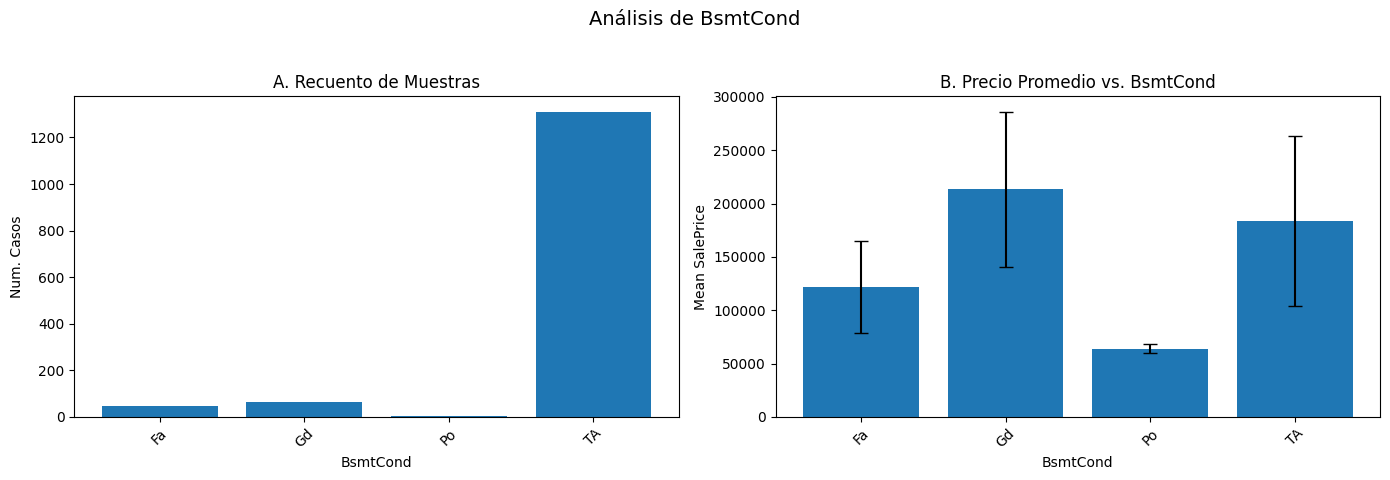

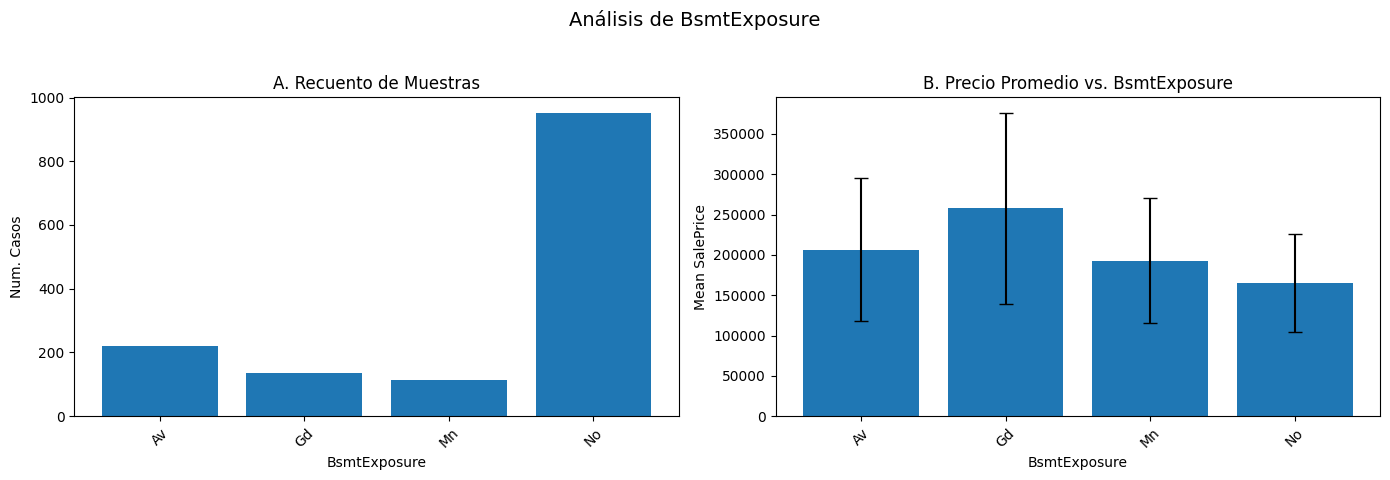

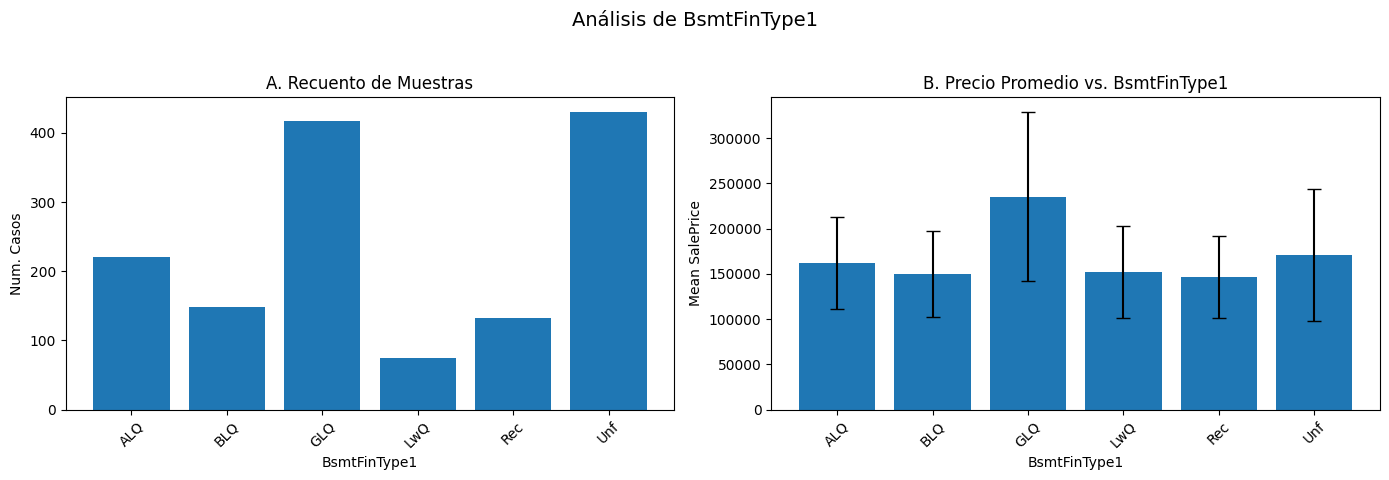

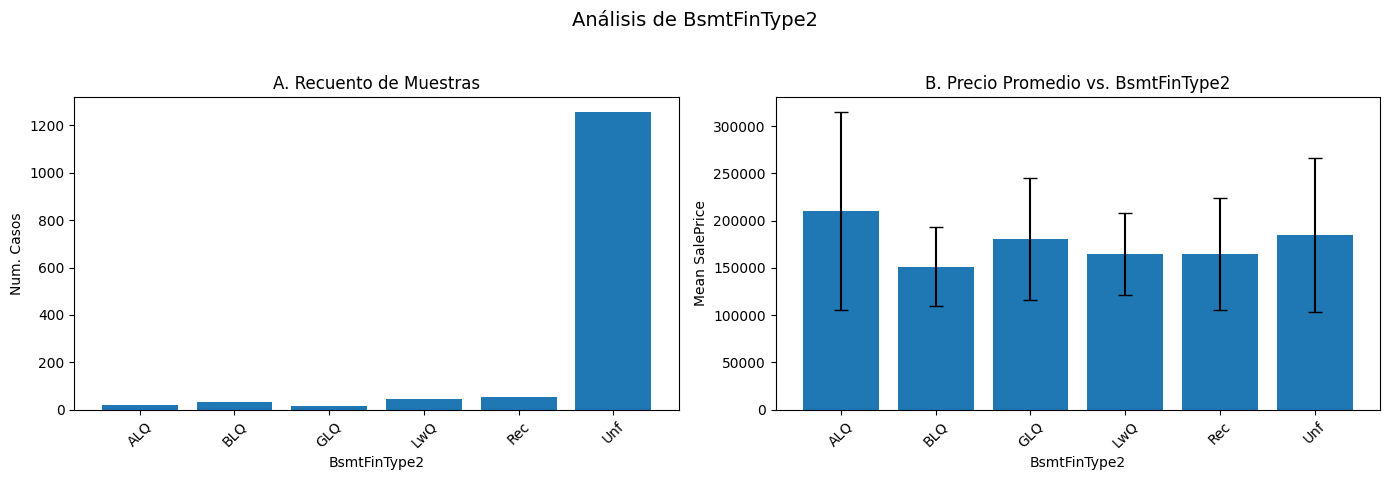

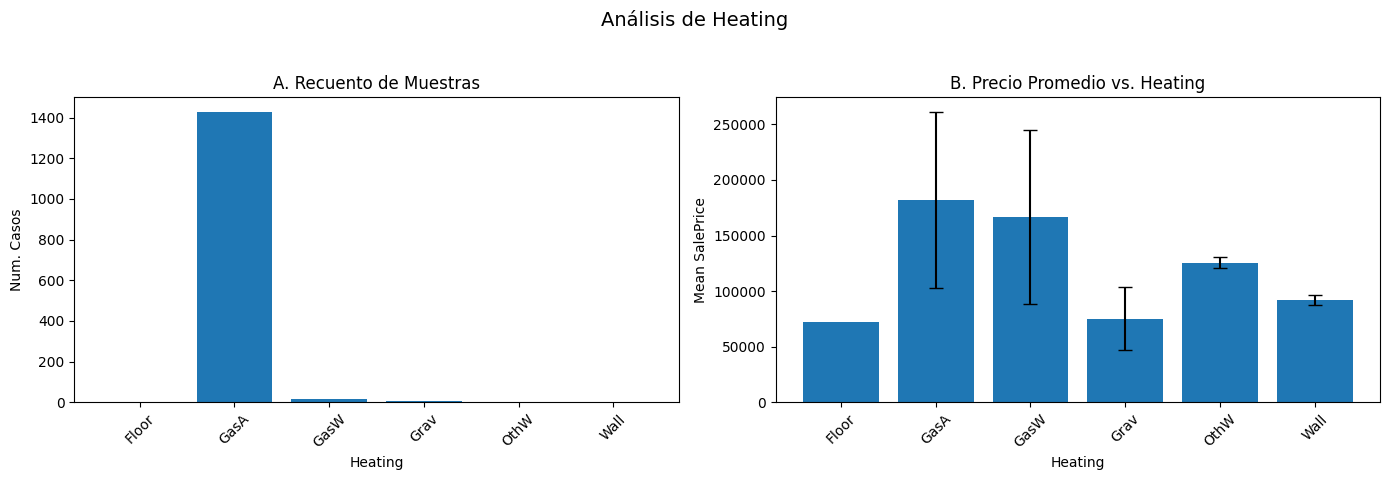

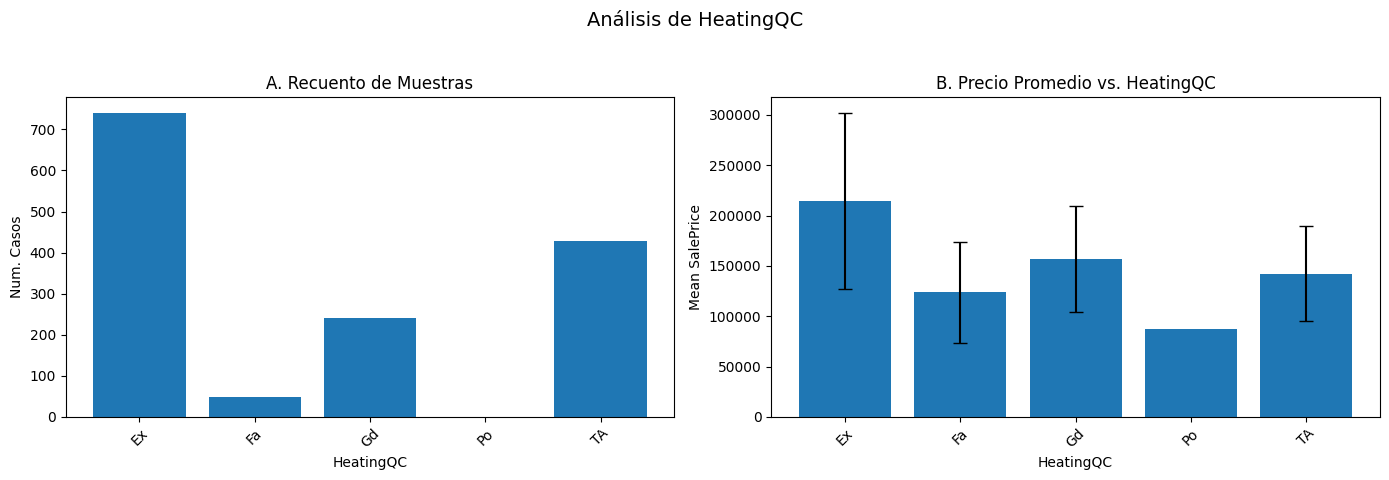

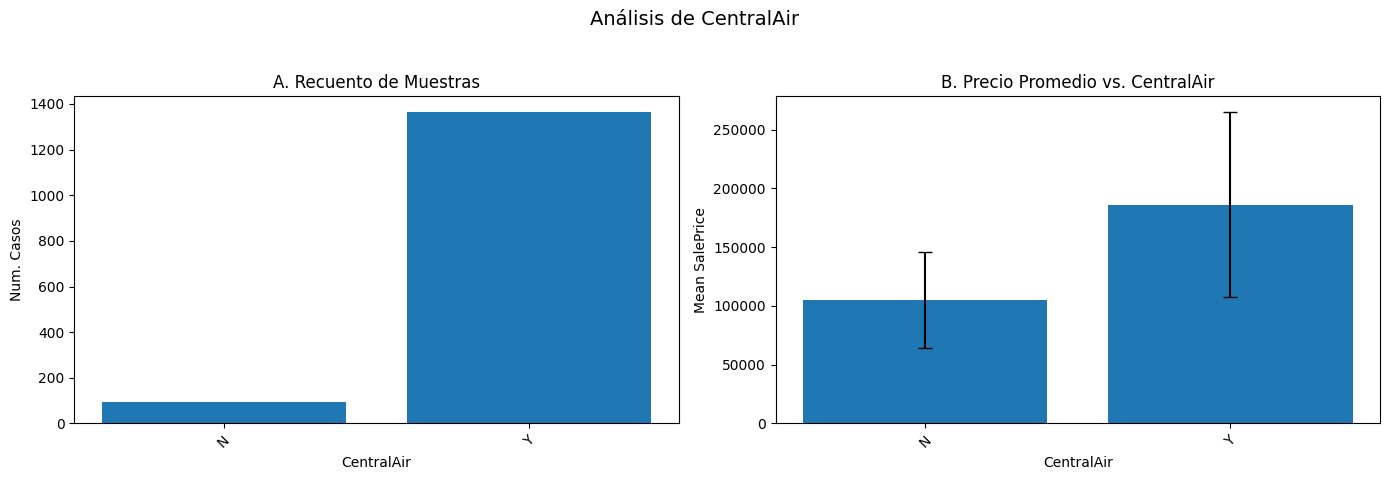

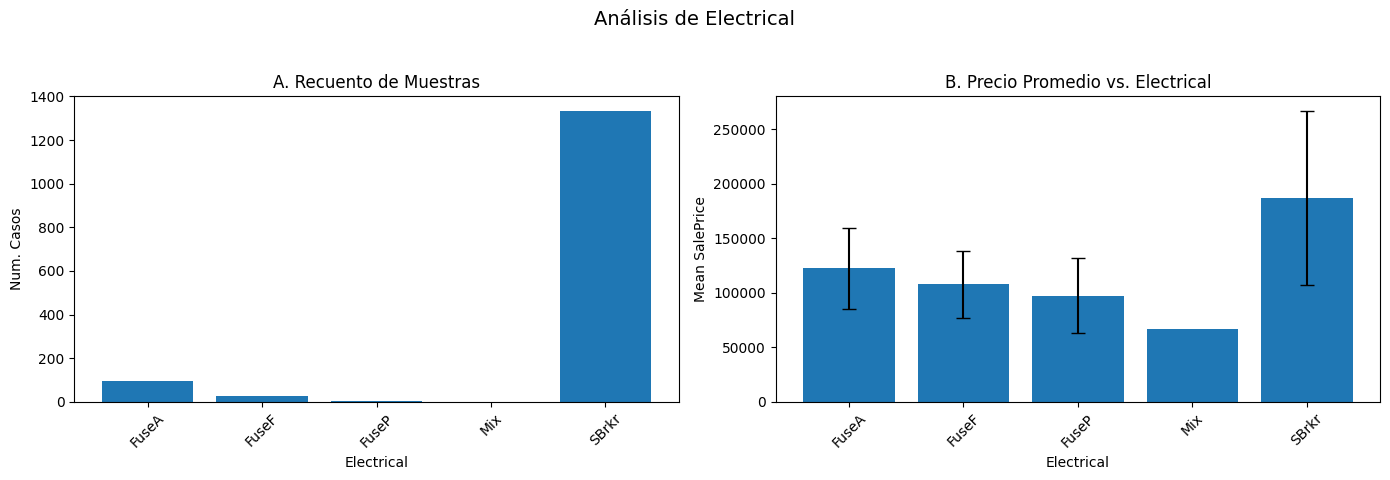

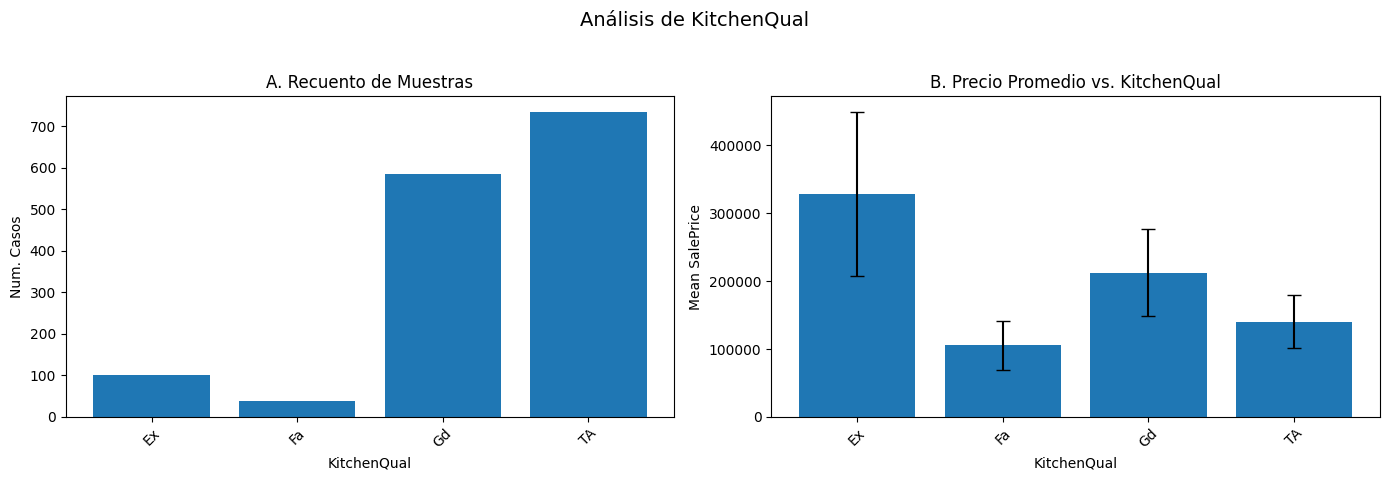

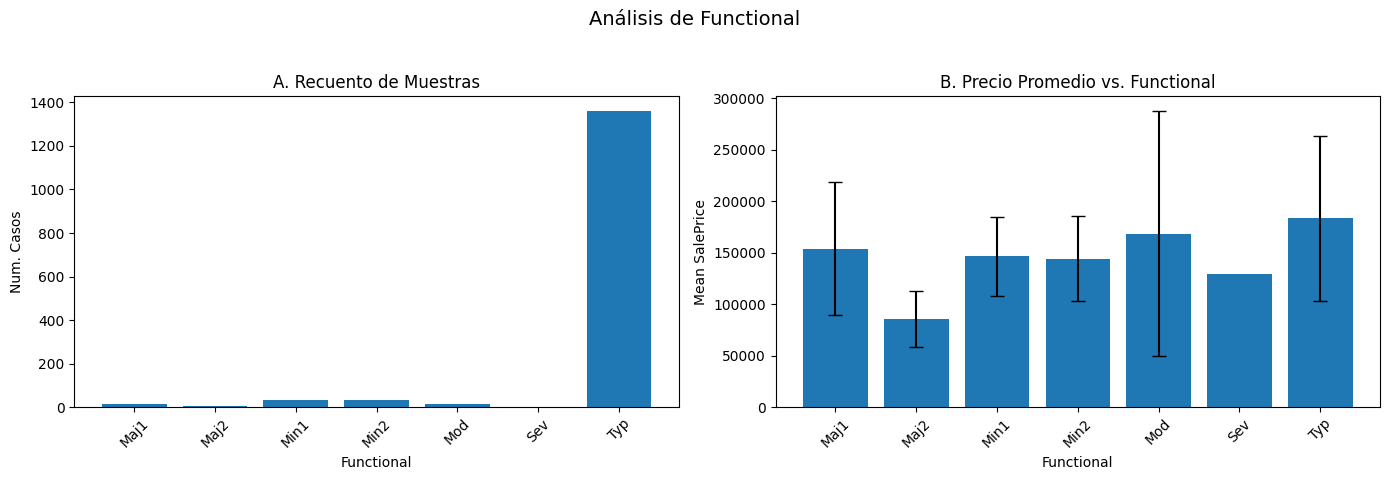

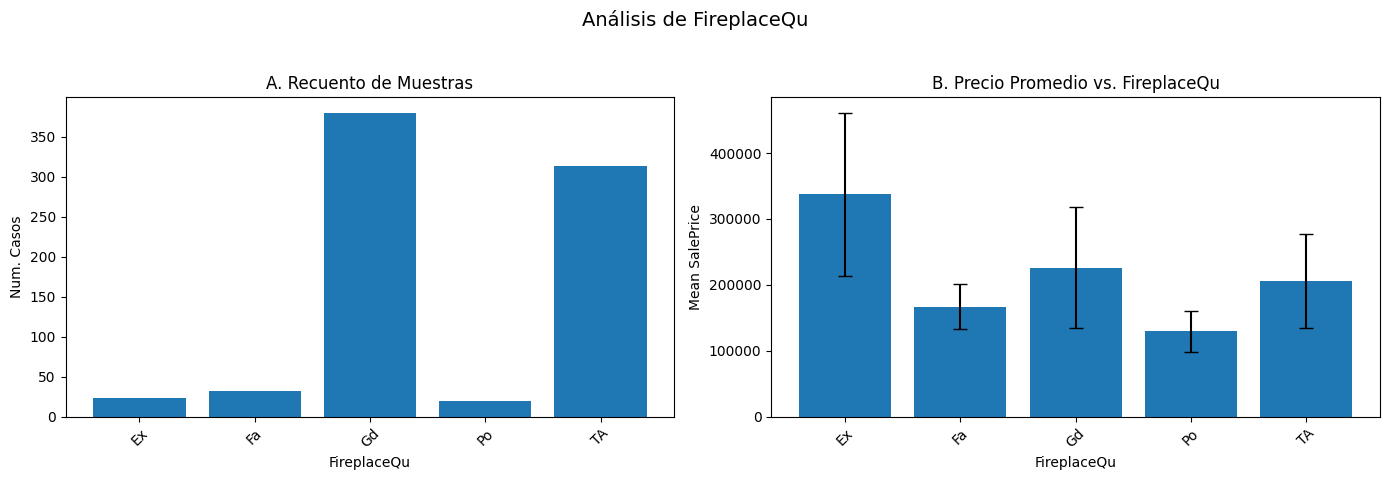

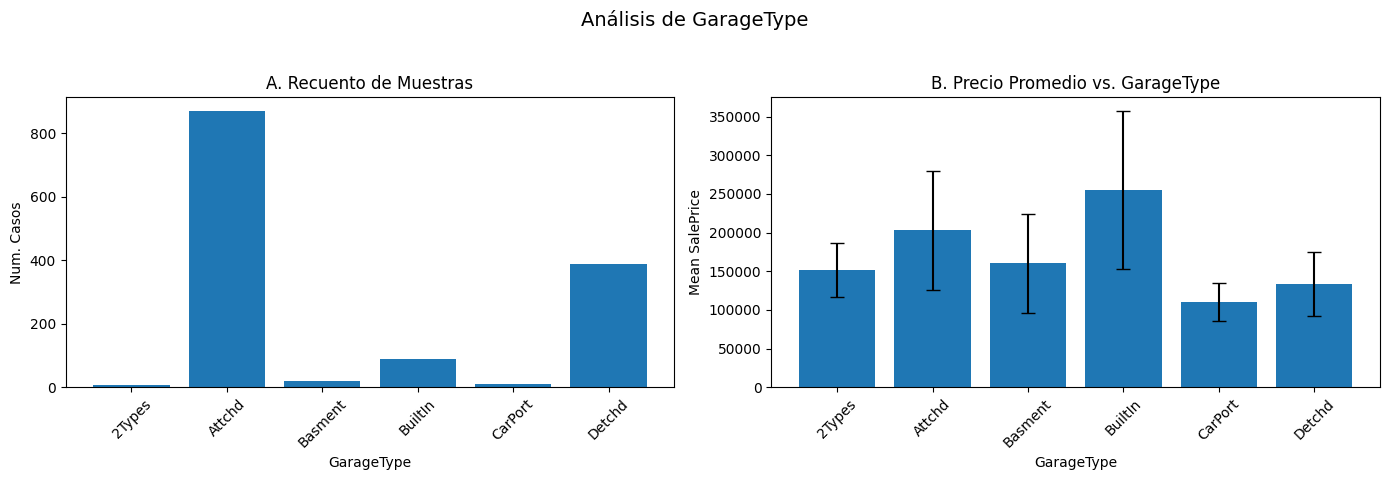

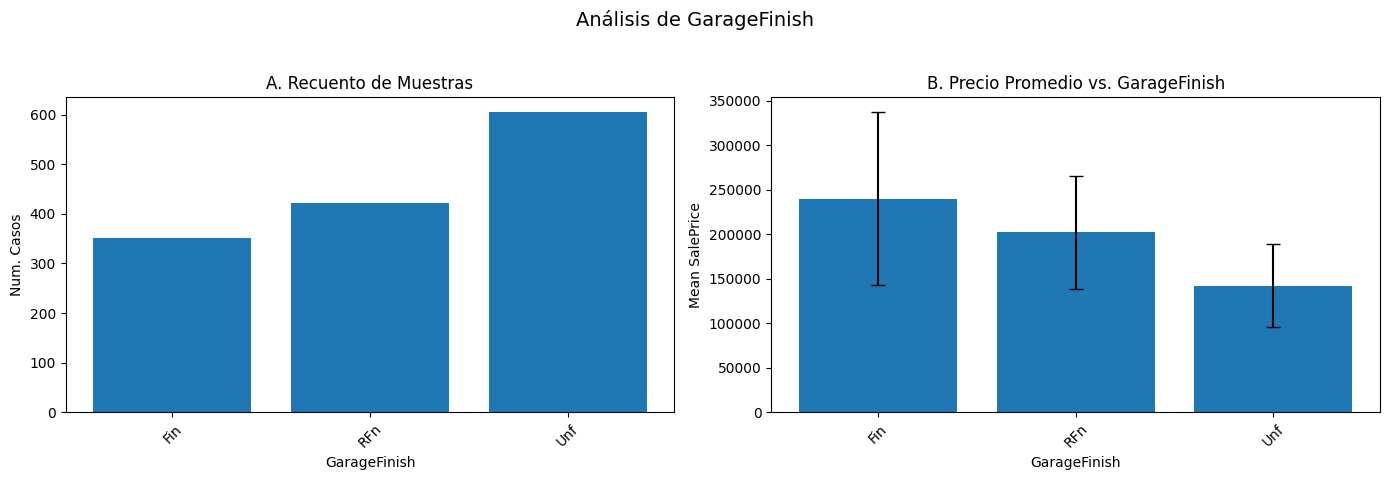

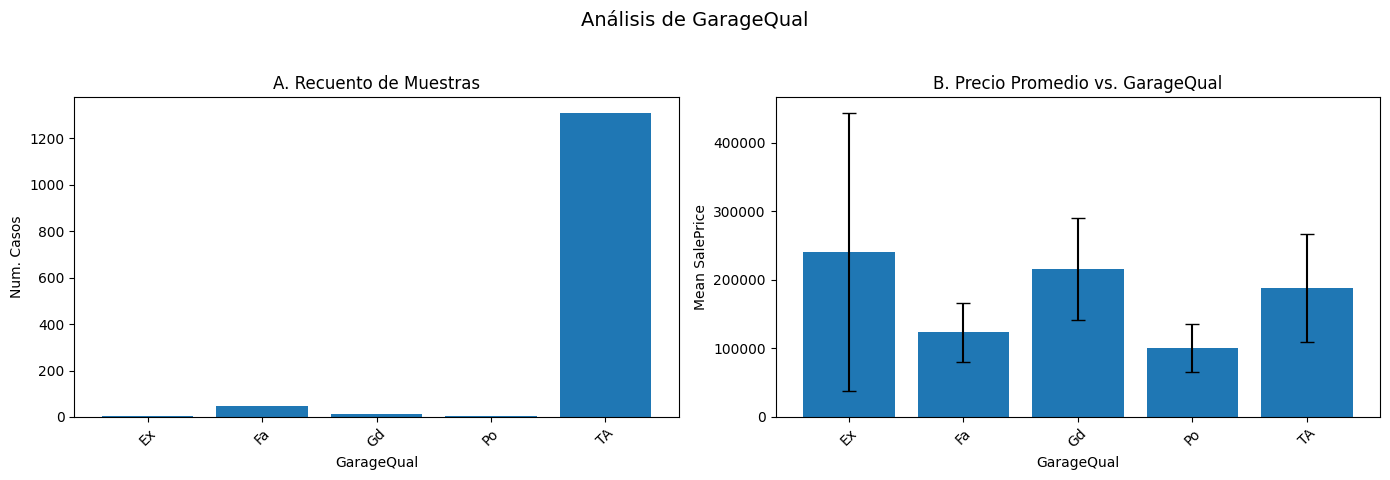

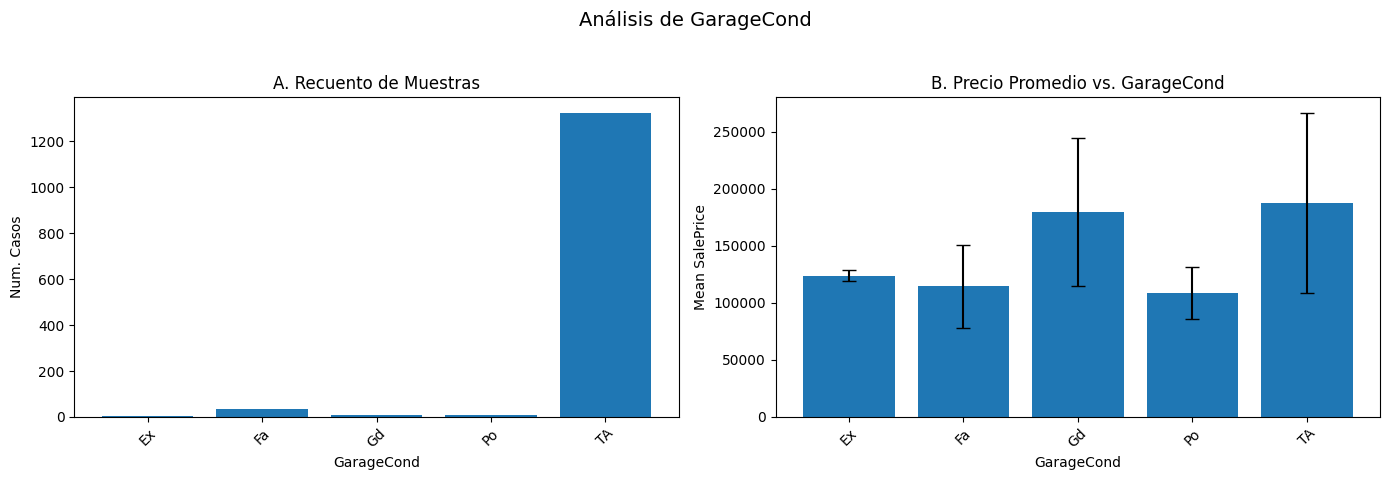

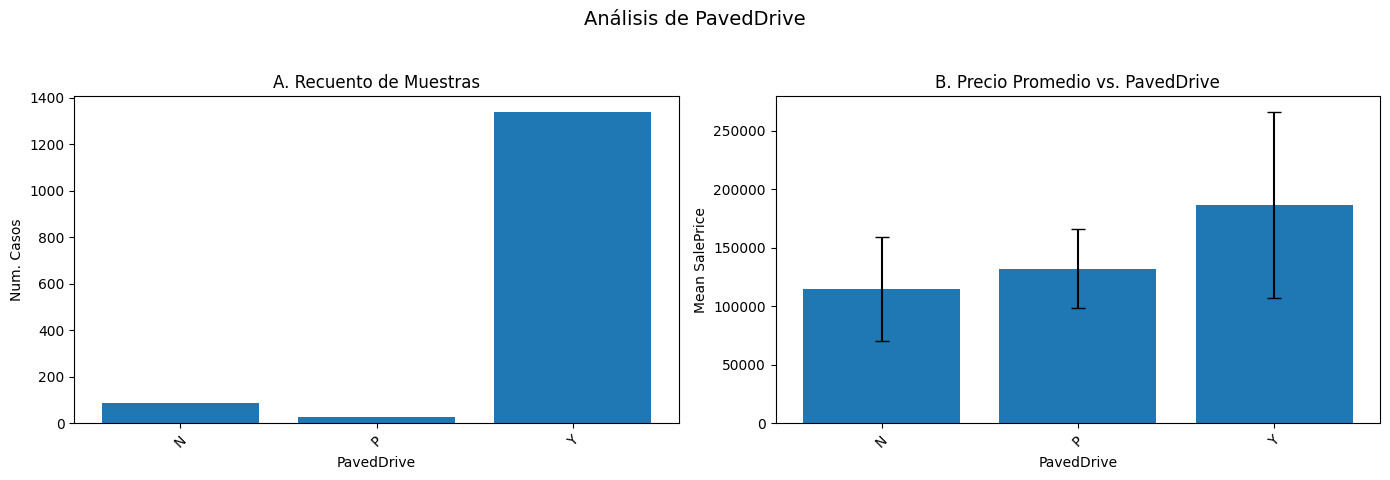

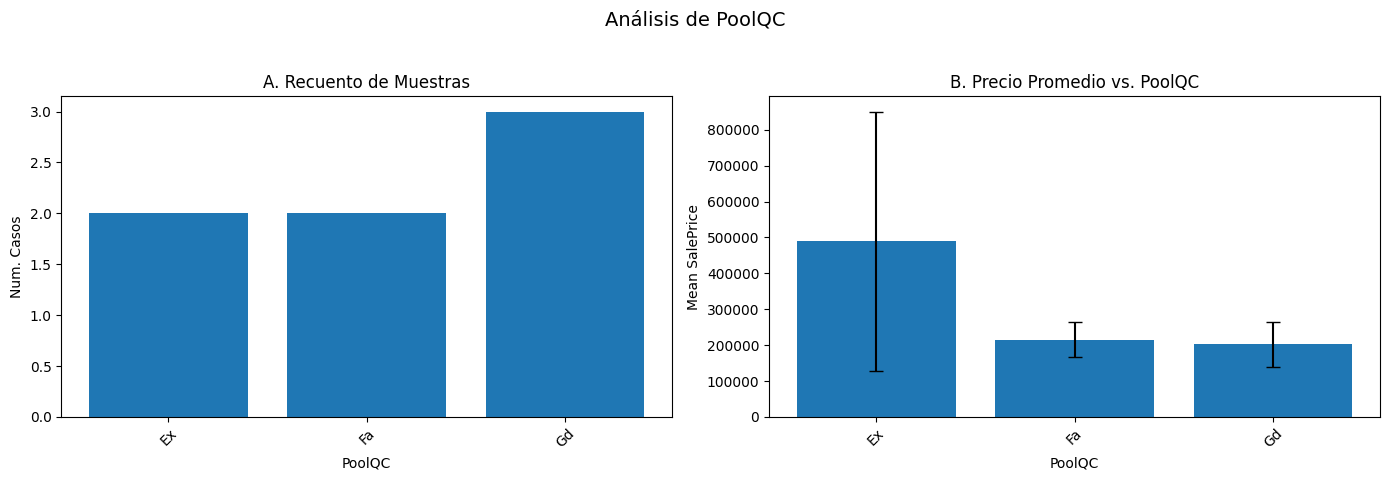

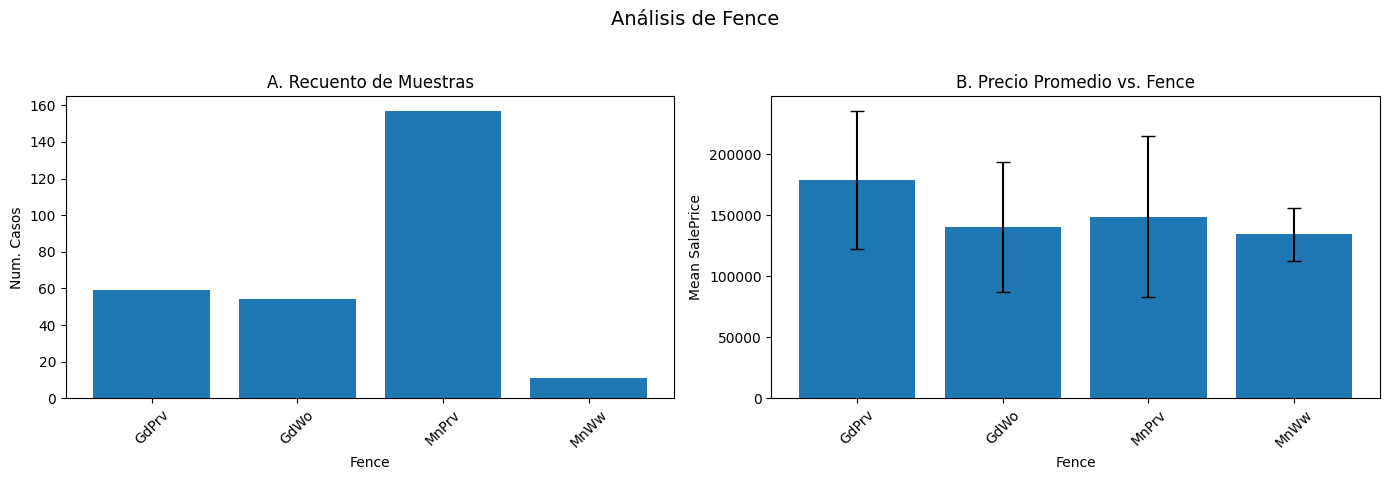

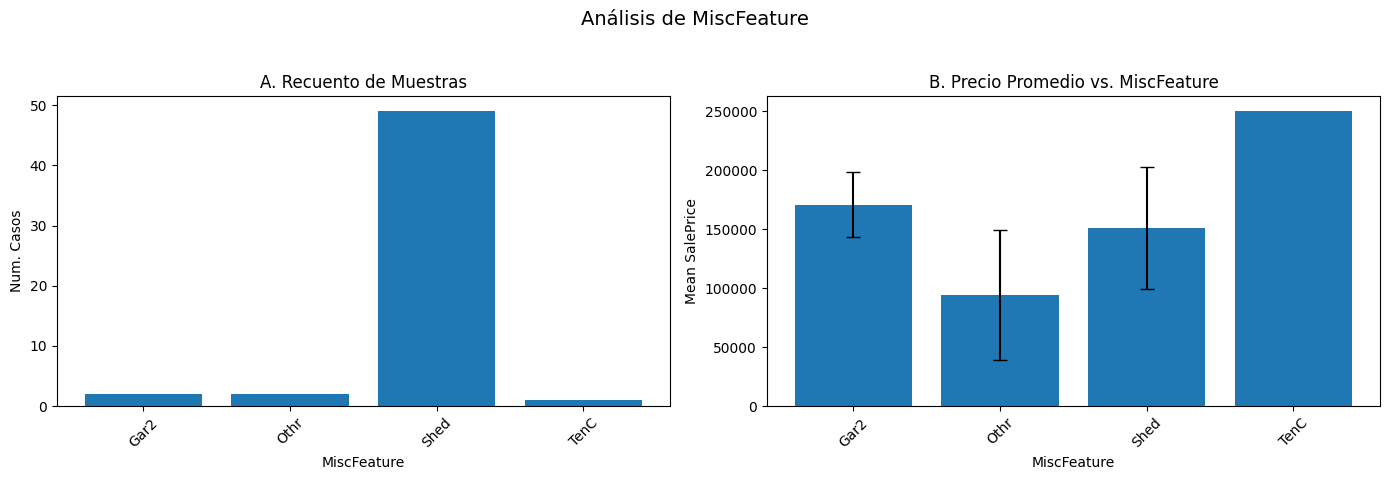

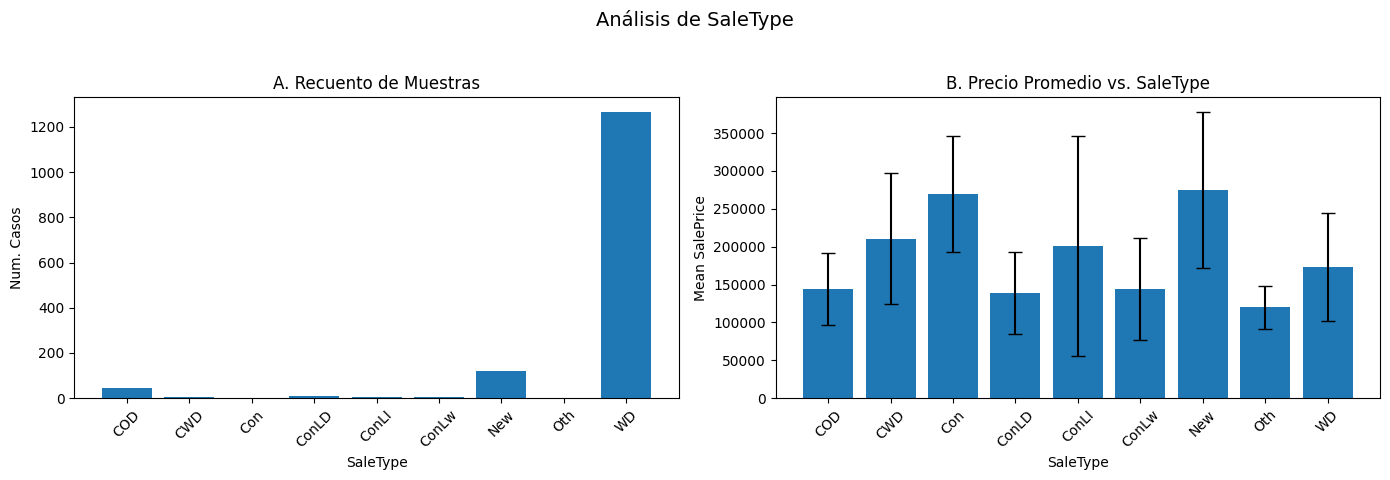

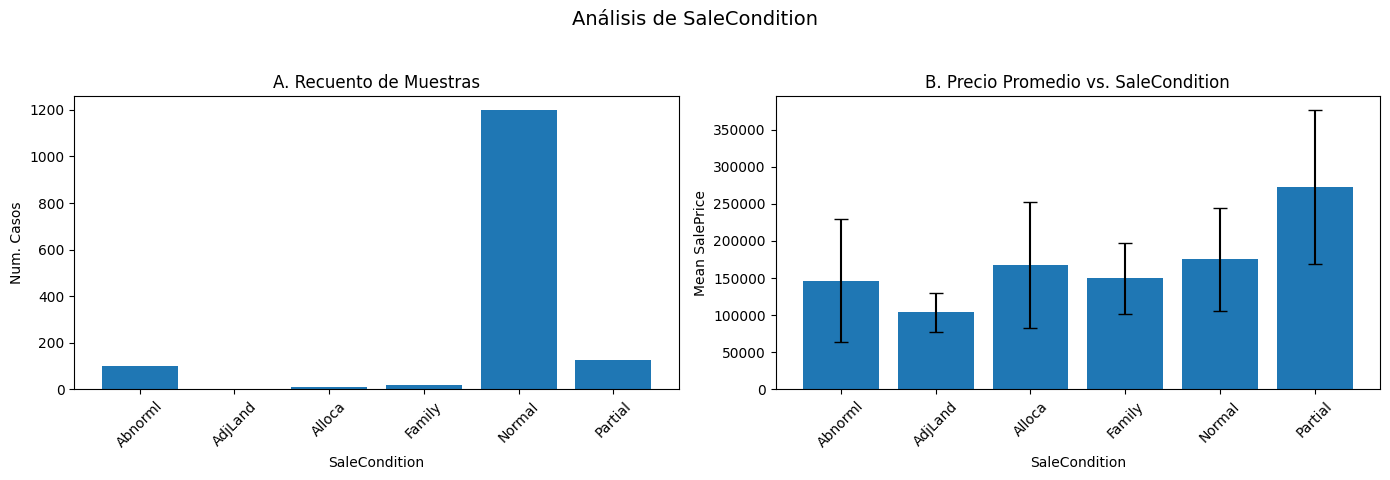

In [19]:
# Interaction variable definition
target = "SalePrice"

# Iterate through each categorical variable...
for col in cat_features:

    # 1. Determine data to focus on
    # Recuento de muestras por categoría
    df_counts = train.groupby(col)['Id'].count()
    
    # Media y desviación estándar del precio de venta por categoría
    df_mean_target = train.groupby(col)['SalePrice'].mean()
    df_std_target = train.groupby(col)['SalePrice'].std()
    
    # Prepara los datos para el gráfico
    x_counts = df_counts.index.tolist()
    h_counts = df_counts.values.tolist()
    
    x_mean = df_mean_target.index.tolist()
    h_mean = df_mean_target.values.tolist()
    errbar = df_std_target.values.tolist()

    # 2. Generate interface for two graphs
    # Creamos una figura con 1 fila y 2 columnas (subplots)
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"Análisis de {col}", fontsize=14)

    # 3. Draw the bar chart with counts on the left (axs[0])
    # Utilizamos df_counts directamente para simplificar el gráfico
    axs[0].bar(x_counts, h_counts)
    axs[0].set_xlabel(col)
    axs[0].set_ylabel('Num. Casos')
    axs[0].set_title('A. Recuento de Muestras')
    # Rotar etiquetas si hay muchas categorías
    axs[0].tick_params(axis='x', rotation=45) 

    # 4. Draw on the right the bar chart with interaction between categories and average response (axs[1])
    # Graficamos la media de SalePrice con las barras de error (desviación estándar)
    axs[1].bar(x_mean, h_mean, yerr=errbar, capsize=5) # capsize es el tamaño de la línea en la barra de error
    axs[1].set_xlabel(col)
    axs[1].set_ylabel(f'Mean {target}')
    axs[1].set_title(f'B. Precio Promedio vs. {col}')
    # Rotar etiquetas si hay muchas categorías
    axs[1].tick_params(axis='x', rotation=45)
    
    # 5. show visualization
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta el layout para que el título no se superponga
    plt.show()

## EJERCICIO 6

Utilice el método `.describe()` para ver la descripción estadística de las características categóricas del DataFrame de `train.csv`

In [20]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### Ingeniería de características (Feature Engineering)
Aquí estaríamos buscando valores nulos y duplicados, seleccionando características, codificando características y creando nuevas características.

En los siguientes ejemplos, vemos diferentes estrategias de ingeniería de software que podemos aplicar a este conjunto de datos. Se pueden aplicar muchas más.

#### Numerical Features

In [21]:
# Change numerical features that are categories to categorical values
train['MSSubClass'] = train['MSSubClass'].astype(str)
test['MSSubClass'] = test['MSSubClass'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

In [22]:
train[['MSSubClass','MoSold']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MSSubClass  1460 non-null   object
 1   MoSold      1460 non-null   object
dtypes: object(2)
memory usage: 22.9+ KB


In [23]:
# correction of outliers
train.loc[(train["GarageYrBlt"]==2207), "GarageYrBlt"] = 2007

## EJERCICIO 7

Cuente el número de valores nulos en las características numéricas y sustituya estos valores con el valor medio de la característica.

Nota: Realiza esta substitución para los DataFrames del conjunto de datos de entrenamiento y tes

In [24]:
# Datos de entrenamiento
nulls_df = train.isnull().sum()
nulls_df.sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

In [25]:
# En "GarageType" tenemos algunas casas sin información, vamos a codificar estos valores nulos como una nueva categoría de "No Garage".
# the missing values are changed to the value "No_Garage"
# Usamos .fillna() para reemplazar los nulos solo si la columna es de tipo 'object' (categórica)
train["GarageType"] = train["GarageType"].fillna("No_Garage")
test["GarageType"] = test["GarageType"].fillna("No_Garage")


# En "LotFrontage" tenemos algunos valores sin información, vamos a asignarles la media de los valores de la característica.
# Calculamos la media del conjunto de entrenamiento
mean_lot_frontage = train["LotFrontage"].mean()
# Replace null values with the mean of the entire column
train["LotFrontage"] = train["LotFrontage"].fillna(mean_lot_frontage)
# important!! apply the transformations learnt from the train set to the test set
# Usamos la media CALCULADA EN EL CONJUNTO DE ENTRENAMIENTO
test["LotFrontage"] = test["LotFrontage"].fillna(mean_lot_frontage) 


# En "GarageYrBlt" tenemos algunos valores nulos y vamos a rellenarlos con el año de construcción del edificio.
# Replace null values with the year of construction of the house 'YearBuilt' 
# Esto funciona porque .fillna() con una Serie (como train['YearBuilt']) alinea los índices.
train["GarageYrBlt"] = train["GarageYrBlt"].fillna(train['YearBuilt'])
test["GarageYrBlt"] = test["GarageYrBlt"].fillna(test['YearBuilt'])



In [26]:
# Podemos crear nuevas variables, combinar algunas de ellas mediante diferentes operaciones.

# Por ejemplo, calcular una nueva columna llamada SqFtPerRoom con los valores de superficie habitable por habitación (como GrLivArea/(TotRmsAbvGrd+FullBath+HalfBath+KitchenAbvGr )) y comprobar la correlación con el objetivo

# Se crea una nueva variable
# Nota: Se añade 1 al denominador para evitar la división por cero y manejar casos donde la suma es 0.
denominator_train = train['TotRmsAbvGrd'] + train['FullBath'] + train['HalfBath'] + train['KitchenAbvGr'] + 1
train["SqFtPerRoom"] = train['GrLivArea'] / denominator_train

denominator_test = test['TotRmsAbvGrd'] + test['FullBath'] + test['HalfBath'] + test['KitchenAbvGr'] + 1
test["SqFtPerRoom"] = test['GrLivArea'] / denominator_test


print("\nCorrelación de la nueva variable 'SqFtPerRoom' con SalePrice:")
print(train["SqFtPerRoom"].corr(train['SalePrice']))


Correlación de la nueva variable 'SqFtPerRoom' con SalePrice:
0.6145847964031174


In [27]:
# Podemos medir la correlación de las características numéricas y los precios objetivo, y las características con bajas correlaciones pueden excluirse del modelo, ya que son menos significativas.

#get the numerical features after last changes, some columns have changed
num_features = train.columns[train.dtypes != "object"]
df_num=train[num_features]

# A dictionary is created with the correlations between the independent variables and the objective variable
dict_corr = {}
for x in num_features:
    # Aseguramos que la columna no sea la misma variable objetivo
    if x != 'SalePrice':
        corr = df_num[x].corr(df_num['SalePrice'])
        dict_corr[x] = corr
    else:
        dict_corr[x] = 1.0 # La correlación consigo mismo es 1

#sort and display dict
# Ordenamos el diccionario por la correlación de forma descendente
dict_corr = sorted(dict_corr.items(), key=lambda x: x[1], reverse=True)
print("\nCorrelaciones con SalePrice:")
print(dict_corr)


Correlaciones con SalePrice:
[('SalePrice', 1.0), ('OverallQual', np.float64(0.7909816005838051)), ('GrLivArea', np.float64(0.7086244776126521)), ('GarageCars', np.float64(0.6404091972583519)), ('GarageArea', np.float64(0.623431438918362)), ('SqFtPerRoom', np.float64(0.6145847964031174)), ('TotalBsmtSF', np.float64(0.6135805515591952)), ('1stFlrSF', np.float64(0.6058521846919146)), ('FullBath', np.float64(0.5606637627484438)), ('TotRmsAbvGrd', np.float64(0.5337231555820282)), ('YearBuilt', np.float64(0.5228973328794971)), ('GarageYrBlt', np.float64(0.5080432871615159)), ('YearRemodAdd', np.float64(0.5071009671113864)), ('MasVnrArea', np.float64(0.4774930470957166)), ('Fireplaces', np.float64(0.4669288367515271)), ('BsmtFinSF1', np.float64(0.3864198062421531)), ('LotFrontage', np.float64(0.33490085154055094)), ('WoodDeckSF', np.float64(0.3244134445681301)), ('2ndFlrSF', np.float64(0.31933380283206814)), ('OpenPorchSF', np.float64(0.31585622711605554)), ('HalfBath', np.float64(0.2841076

#### matriz de correlación

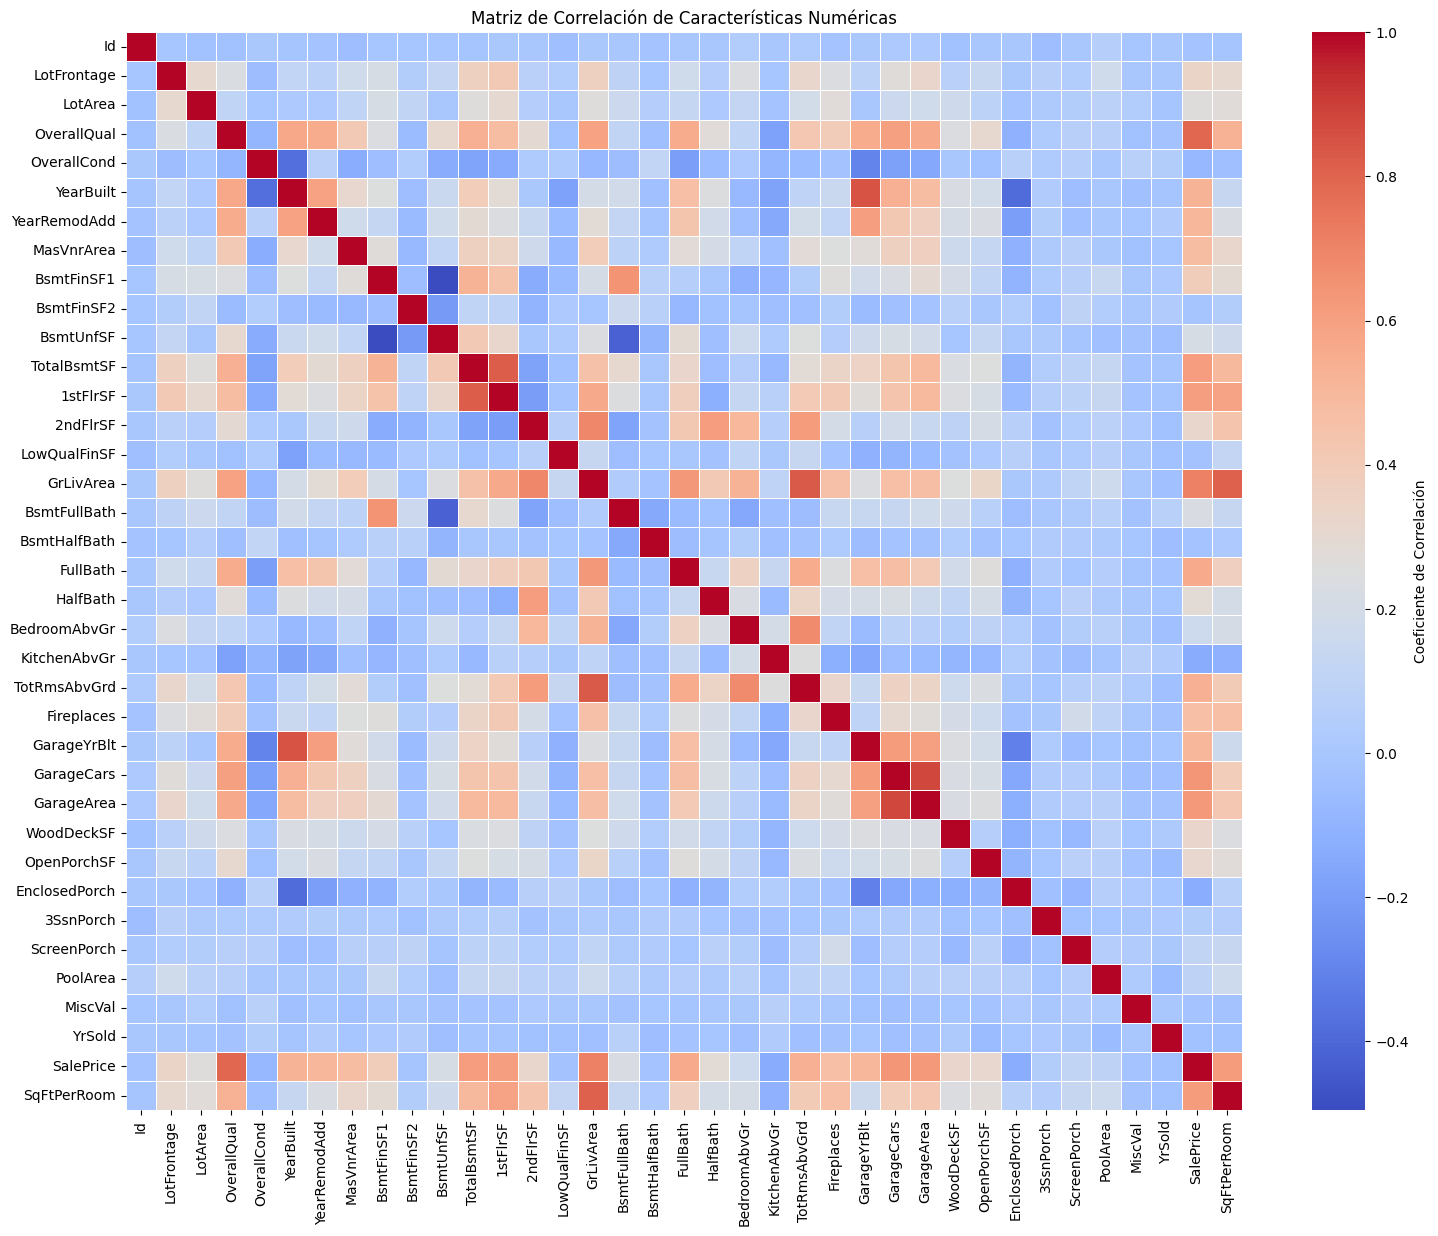

In [28]:
# 1. Seleccionar ÚNICAMENTE las características numéricas
# Esto excluye automáticamente todas las columnas con tipo 'object' (cadenas de texto).
df_numeric = train.select_dtypes(include=np.number)

# 2. Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# 3. Configurar la figura
plt.figure(figsize=(18, 14)) # Aumentamos el tamaño para mejor visualización

# 4. Crear el mapa de calor (Heatmap)
sns.heatmap(
    correlation_matrix,
    annot=False,        # Establecemos en False para no saturar la visualización
    cmap='coolwarm',    
    fmt=".2f",          
    linewidths=.5,      
    cbar_kws={'label': 'Coeficiente de Correlación'}
)

plt.title('Matriz de Correlación de Características Numéricas')
plt.show()

## EJERCICIO 8

Transforme la característica `OverallQual` con los escaladores`StandardScaler(), RobustScaler(), MinMaxScaler()`  y compruebe si la correlación con el objetivo mejora.

#### LotArea

In [29]:
print('Correlation: ', train['LotArea']. corr (train['SalePrice']))

Correlation:  0.2638433538714056


In [30]:
# Variable objetivo y variable de interés
target = 'SalePrice'
feature = 'LotArea'

print(f"Correlación BASELINE ({feature} vs SalePrice): {train[feature].corr(train[target]):.4f}")

# ============================================================
# TRANSFORMACIONES DE ESCALADO
# ============================================================
scalers = [
    ('StandardScaler', StandardScaler()),
    ('RobustScaler', RobustScaler()),
    ('MinMaxScaler', MinMaxScaler())
]

print("\n--- Correlación tras Escalado ---")
for name, scaler in scalers:
    # 1. Aplicar la transformación
    # .values.reshape(-1, 1) es necesario porque los escaladores esperan una matriz 2D
    X_scaled = scaler.fit_transform(train[[feature]].values)
    
    # 2. Convertir a Serie para calcular la correlación
    # Se usa .flatten() para convertir la matriz 2D de vuelta a una Serie 1D
    transformed_feature = pd.Series(X_scaled.flatten(), index=train.index)
    
    # 3. Calcular y mostrar la correlación
    corr = transformed_feature.corr(train[target])
    print(f"Correlación con {name:<16}: {corr:.4f}")


# ============================================================
# TRANSFORMACIONES NO LINEALES (Potencia y Cuantil)
# ============================================================

# Definimos los transformadores con el objeto de la clase
transformers = [
    ('PowerTransformer (box-cox)', PowerTransformer(method='box-cox', standardize=False)), # box-cox requiere datos positivos
    ('PowerTransformer (yeo-johnson)', PowerTransformer(method='yeo-johnson', standardize=False)),
    ('QuantileTransformer', QuantileTransformer(output_distribution='normal', n_quantiles=len(train))) # n_quantiles debe ser <= n_samples
]

# Nota: La característica 'OverallQual' ya es ordinal y casi normalmente distribuida. 
# La transformación podría no mejorar, pero la probamos.

print("\n--- Correlación tras Transformación de Potencia/Cuantil ---")
for name, transformer in transformers:
    # 1. Aplicar la transformación
    # Manejar el caso de Box-Cox: si hay ceros o negativos, se usa Yeo-Johnson
    if name == 'PowerTransformer (box-cox)':
        # Box-Cox requiere que los datos sean estrictamente positivos.
        # OverallQual es [1-10], por lo que funciona.
        X_transformed = transformer.fit_transform(train[[feature]].values + 1e-6) # Sumamos un epsilon pequeño
    else:
        X_transformed = transformer.fit_transform(train[[feature]].values)
        
    # 2. Convertir a Serie para calcular la correlación
    transformed_feature = pd.Series(X_transformed.flatten(), index=train.index)
    
    # 3. Calcular y mostrar la correlación
    corr = transformed_feature.corr(train[target])
    print(f"Correlación con {name:<30}: {corr:.4f}")

Correlación BASELINE (LotArea vs SalePrice): 0.2638

--- Correlación tras Escalado ---
Correlación con StandardScaler  : 0.2638
Correlación con RobustScaler    : 0.2638
Correlación con MinMaxScaler    : 0.2638

--- Correlación tras Transformación de Potencia/Cuantil ---
Correlación con PowerTransformer (box-cox)    : 0.3895
Correlación con PowerTransformer (yeo-johnson): 0.3895
Correlación con QuantileTransformer           : 0.4415


En el contexto del dataset de precios de viviendas, las características que suelen mejorar su correlación tras la transformación logarítmica son las relacionadas con el área, ya que tienen una fuerte asimetría positiva

#### Características categóricas

Codifique una característica categórica con información ordinal en números.

In [31]:
# ExterQual: Evaluates the quality of the material on the exterior
ExterQual = {}
ExterQual['Ex'] = 5 #'Excellent'
ExterQual['Gd'] = 4 #'Good'
ExterQual['TA'] = 3 #'Average/Typical'
ExterQual['Fa'] = 2 #'Fair'
ExterQual['Po'] = 1 #'Poor'
ExterQual['NA'] = 0 #'NA'

train.ExterQual = train.ExterQual.map(ExterQual)
test.ExterQual = test.ExterQual.map(ExterQual)
print('train', train['ExterQual'].unique())
print('test', test['ExterQual'].unique())

train [4 3 5 2]
test [3 4 5 2]


Podemos codificar variables categóricas que son ordinales y medir su correlación con la variable objetivo. Las características categóricas con bajas correlaciones pueden excluirse del modelo, ya que son menos significativas.

Correlation:  0.6826392416562587


<Axes: title={'center': 'ExterQual_test'}>

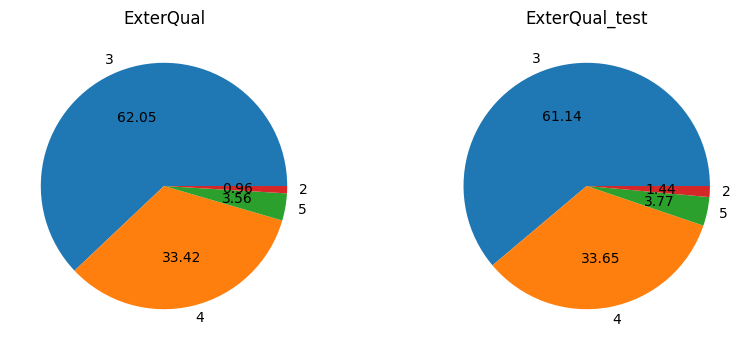

In [32]:
print('Correlation: ', train['ExterQual'].corr(train['SalePrice']))
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
train["ExterQual"].value_counts().rename("").plot.pie(autopct='%.2f', ax=ax[0], title="ExterQual")
test["ExterQual"].value_counts().rename("").plot.pie(autopct='%.2f', ax=ax[1], title="ExterQual_test")

Codifique un valor categórico `BsmtFinType1` que no sea ordinal con el método de codificación one-hot.

In [33]:
train.groupby('BsmtFinType1').groups.keys()

dict_keys(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf'])

In [34]:
train[['BsmtFinType1']]

BsmtFinType1
0             GLQ
1             ALQ
2             GLQ
3             ALQ
4             GLQ
...           ...
1455          Unf
1456          ALQ
1457          GLQ
1458          GLQ
1459          BLQ

[1460 rows x 1 columns]

In [35]:
#creating the encoder
pt = OneHotEncoder()
# transforming
transformed = pt.fit_transform(train[['BsmtFinType1']]).toarray()
df_transformed=pd.DataFrame(transformed, columns=['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf','NA'])  #a dummy column is created for all categories are 0.0 this is 1.0, we can drop it
display(df_transformed)
#transformed.shape
df_transformed.drop('NA', axis=1)

ALQ  BLQ  GLQ  LwQ  Rec  Unf   NA
0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
1     1.0  0.0  0.0  0.0  0.0  0.0  0.0
2     0.0  0.0  1.0  0.0  0.0  0.0  0.0
3     1.0  0.0  0.0  0.0  0.0  0.0  0.0
4     0.0  0.0  1.0  0.0  0.0  0.0  0.0
...   ...  ...  ...  ...  ...  ...  ...
1455  0.0  0.0  0.0  0.0  0.0  1.0  0.0
1456  1.0  0.0  0.0  0.0  0.0  0.0  0.0
1457  0.0  0.0  1.0  0.0  0.0  0.0  0.0
1458  0.0  0.0  1.0  0.0  0.0  0.0  0.0
1459  0.0  1.0  0.0  0.0  0.0  0.0  0.0

[1460 rows x 7 columns]

ALQ  BLQ  GLQ  LwQ  Rec  Unf
0     0.0  0.0  1.0  0.0  0.0  0.0
1     1.0  0.0  0.0  0.0  0.0  0.0
2     0.0  0.0  1.0  0.0  0.0  0.0
3     1.0  0.0  0.0  0.0  0.0  0.0
4     0.0  0.0  1.0  0.0  0.0  0.0
...   ...  ...  ...  ...  ...  ...
1455  0.0  0.0  0.0  0.0  0.0  1.0
1456  1.0  0.0  0.0  0.0  0.0  0.0
1457  0.0  0.0  1.0  0.0  0.0  0.0
1458  0.0  0.0  1.0  0.0  0.0  0.0
1459  0.0  1.0  0.0  0.0  0.0  0.0

[1460 rows x 6 columns]

## Entrenar un modelo

Para predecir una variable continua con un conjunto de datos etiquetado, podemos utilizar un modelo de regresión.

Tomemos algunas características numéricas, las que tienen mayor correlación:

```
 ('OverallQual', 0.7909816005838044),
 ('GrLivArea', 0.7086244776126523),
 ('GarageCars', 0.6404091972583529),
 ('GarageArea', 0.6234314389183618),
 ('TotalBsmtSF', 0.6135805515591956),
 ('1stFlrSF', 0.6058521846919147),
 ('FullBath', 0.5606637627484449),
```

In [36]:
from sklearn.ensemble import RandomForestRegressor

# Read the train data
train = pd.read_csv('train.csv')

# Create a Random Forest object
rf = RandomForestRegressor()

features=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath']
# Train a model
rf.fit(X=train[features], y=train['SalePrice'])

RandomForestRegressor()

## Preparar una presentación

Lea los datos de prueba, haga predicciones y guárdelas en el formato especificado en el archivo "sample_submission.csv".

In [37]:
# Read test and sample submission data
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Show the head() of the sample_submission
print(sample_submission.head())

     Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977


## EJERCICIO 9

Prepare un archivo de presentación llamado `kaggle_submission.csv` con las predicciones del modelo.

Utilice el método `.predict()` del modelo para generar las predicciones.

In [38]:
# 1. Preparación del DataFrame de prueba para la predicción
# Rellenamos los NaN del set de prueba con 0.0, como se indicó en el ejercicio
predict_df = test[features].fillna(0.0) 

# 2. Obtener las predicciones para el set de prueba usando el modelo entrenado (rf)
predictions = rf.predict(predict_df)

# Asignamos las predicciones (el precio de venta) a la columna en el DataFrame de prueba
test['SalePrice'] = predictions #your code

# 3. Escribir test predictions usando el sample_submission format
# Creamos el DataFrame final con solo 'Id' y 'SalePrice'
submission_output = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': test['SalePrice']
})

# Escribir en el archivo CSV (sin el índice, que no es requerido por Kaggle)
submission_output.to_csv('kaggle_submission.csv', index=False) #your code

print("Archivo 'kaggle_submission.csv' creado con éxito con las predicciones del Random Forest.")
print("Primeras 5 líneas del archivo de envío:")
print(submission_output.head())

Archivo 'kaggle_submission.csv' creado con éxito con las predicciones del Random Forest.
Primeras 5 líneas del archivo de envío:
     Id  SalePrice
0  1461  127961.00
1  1462  157441.32
2  1463  145995.53
3  1464  180839.00
4  1465  226037.36


## Hacer una presentación

En el panel de Kaggle se puede ver el resultado de la presentación.

## EJERCICIO 10

Haga su propia presentación y compruebe su posición en la tabla de clasificación.

In [39]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f kaggle_submission.csv -m "today 2025-10-21 submission - model0"

100%|██████████████████████████████████████| 22.6k/22.6k [00:00<00:00, 37.6kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques